In [1]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
import plotly.graph_objects as go
def load_agents(filename):
    with open(filename, 'rb') as file:
        print('Loading agents from file: ' + filename)
        return pickle.load(file)

In [2]:
directory_path = '../saved_sim_runs'
files = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]

files = [f for f in files if '1000' in f]
files.sort()
print(files)

['low_0.0_med_0.0_high_1.0_10000_iterations_1713252003015886000.pkl', 'low_0.0_med_0.1_high_0.9_10000_iterations_1713251988744997000.pkl', 'low_0.0_med_0.2_high_0.8_10000_iterations_1713251987920820000.pkl', 'low_0.0_med_0.30000000000000004_high_0.7_10000_iterations_1713252018224723000.pkl', 'low_0.0_med_0.4_high_0.6_10000_iterations_1713252036865689000.pkl', 'low_0.0_med_0.5_high_0.5_10000_iterations_1713252016530028000.pkl', 'low_0.0_med_0.6000000000000001_high_0.3999999999999999_10000_iterations_1713251988262865000.pkl', 'low_0.0_med_0.7000000000000001_high_0.29999999999999993_10000_iterations_1713251999846952000.pkl', 'low_0.0_med_0.8_high_0.19999999999999996_10000_iterations_1713252023488273000.pkl', 'low_0.0_med_0.9_high_0.09999999999999998_10000_iterations_1713251994123987000.pkl', 'low_0.0_med_1.0_high_0.0_10000_iterations_1713252011126211000.pkl', 'low_0.1_med_0.0_high_0.9_10000_iterations_1713252006773564000.pkl', 'low_0.1_med_0.1_high_0.8_10000_iterations_1713252012889140000

In [5]:
sim_agents_list = []
for file in files:
    try:
        split = file.split('_')
        percent_low = split[1]
        percent_med = split[3]
        percent_hight = split[5]
        agents = load_agents(os.path.join(directory_path, file))
        sim_agents_list.append((percent_low, agents))
        print(f'Loaded agents from file: {file}')
    except Exception as e:
        print(f'Error loading agents from file: {file}')
        print(e)

Loading agents from file: ../saved_sim_runs/low_0.0_med_0.0_high_1.0_10000_iterations_1713252003015886000.pkl
Error loading agents from file: low_0.0_med_0.0_high_1.0_10000_iterations_1713252003015886000.pkl
Ran out of input
Loading agents from file: ../saved_sim_runs/low_0.0_med_0.1_high_0.9_10000_iterations_1713251988744997000.pkl
Error loading agents from file: low_0.0_med_0.1_high_0.9_10000_iterations_1713251988744997000.pkl
Ran out of input
Loading agents from file: ../saved_sim_runs/low_0.0_med_0.2_high_0.8_10000_iterations_1713251987920820000.pkl
Error loading agents from file: low_0.0_med_0.2_high_0.8_10000_iterations_1713251987920820000.pkl
Ran out of input
Loading agents from file: ../saved_sim_runs/low_0.0_med_0.30000000000000004_high_0.7_10000_iterations_1713252018224723000.pkl
Error loading agents from file: low_0.0_med_0.30000000000000004_high_0.7_10000_iterations_1713252018224723000.pkl
Ran out of input
Loading agents from file: ../saved_sim_runs/low_0.0_med_0.4_high_0.6

In [6]:
sim_agents_list

[]

In [10]:
def sort_agents_by_opinion(agents):
    return sorted(agents.items(), key=lambda x: x[1].opinions[0])

In [11]:
def find_max_length_index_range(data, threshold, above_threshold=True):
    start_index = None
    max_range = (None, None)
    max_length = 0

    for i, value in enumerate(data):
        if (value > threshold if above_threshold else value < threshold):
            if start_index is None:
                start_index = i  # Start tracking a new range
        else:
            if start_index is not None:
                # Check the length of the current range
                current_length = i - start_index
                if current_length > max_length:
                    max_length = current_length
                    max_range = (start_index, i - 1)
                start_index = None  # Reset start index for the next potential range

    # Handle the case where the last values meet the condition and the range extends to the end of the data
    if start_index is not None:
        current_length = len(data) - start_index
        if current_length > max_length:
            max_range = (start_index, len(data) - 1)

    # If no valid range is found, return None
    if max_range[0] is None:
        return None

    return max_range

Sim with 0.1


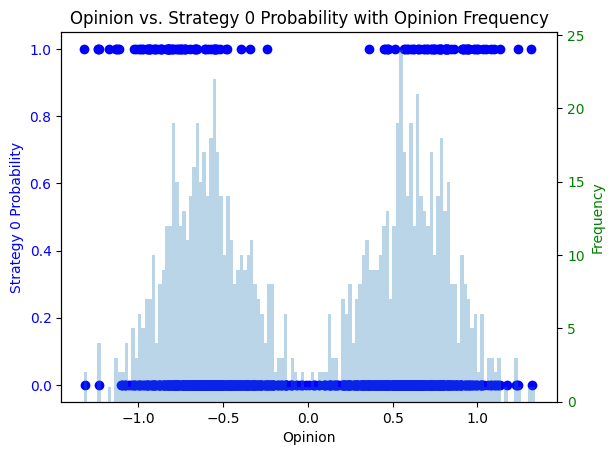

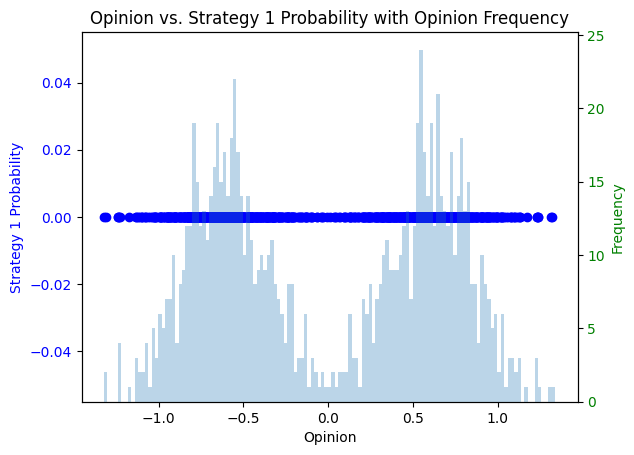

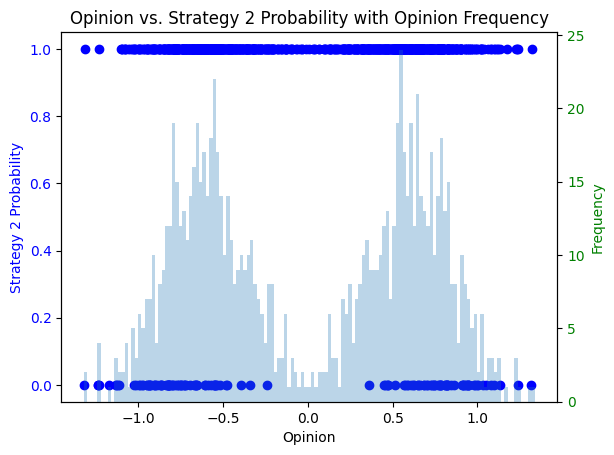

Sim with 0.2


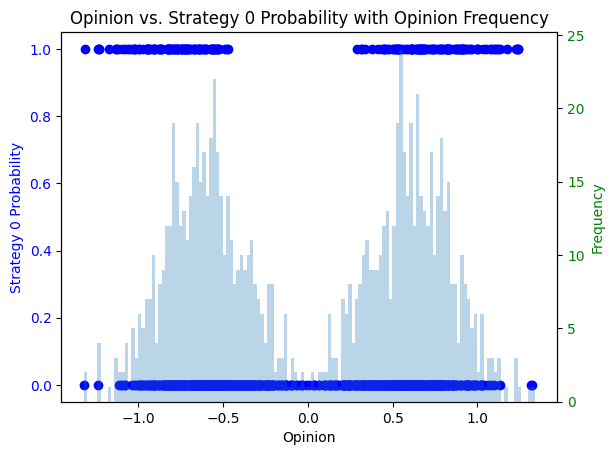

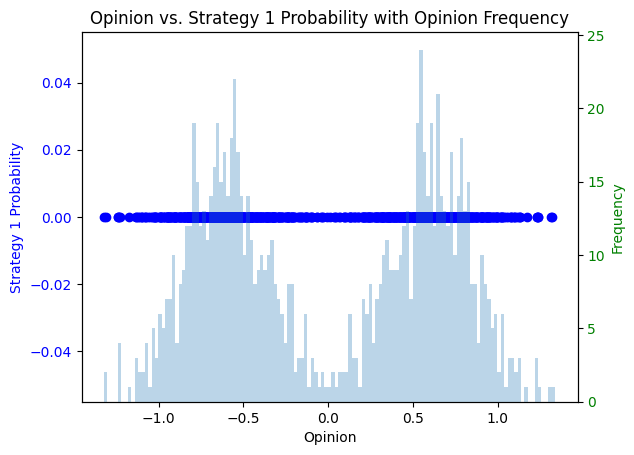

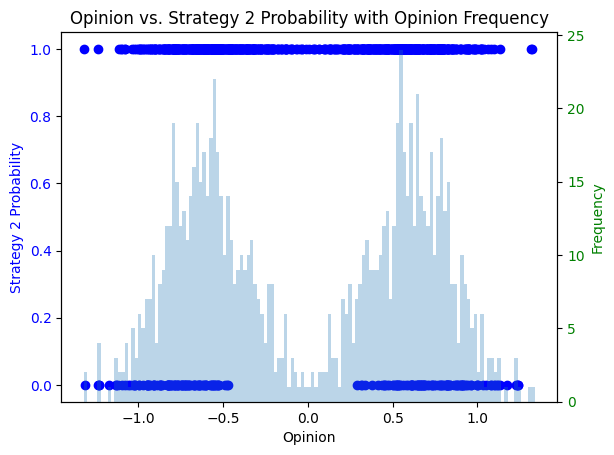

Sim with 0.3


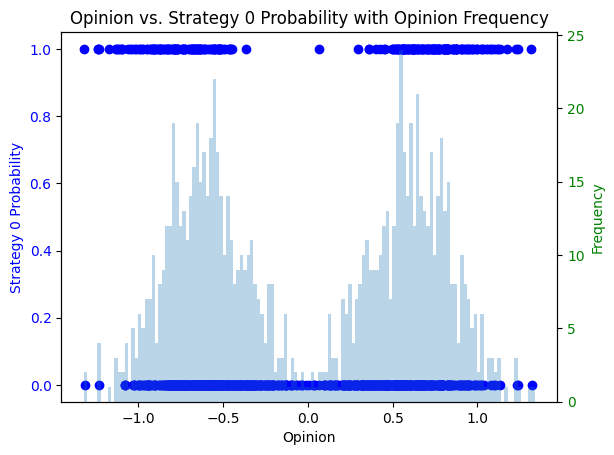

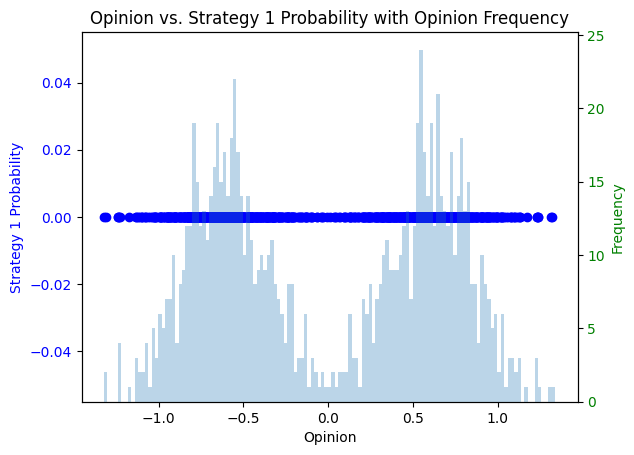

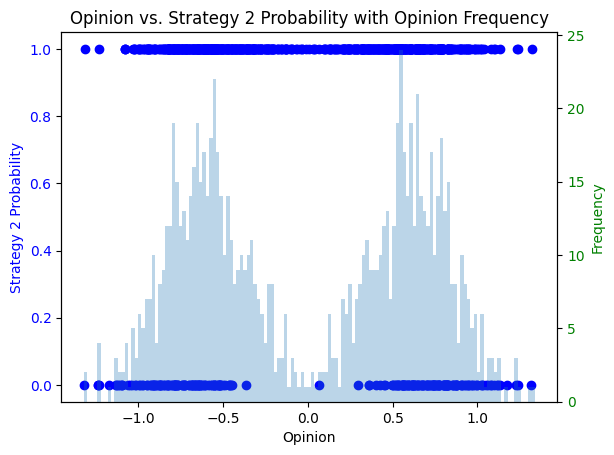

Sim with 0.4


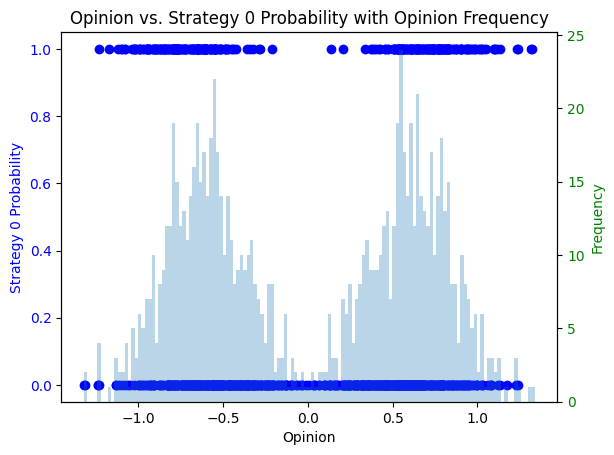

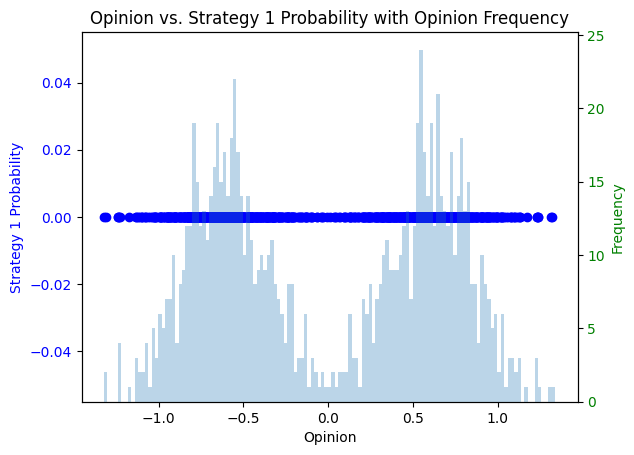

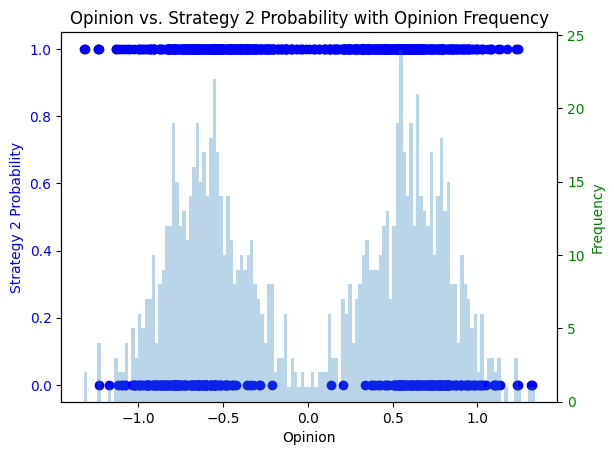

Sim with 0.5


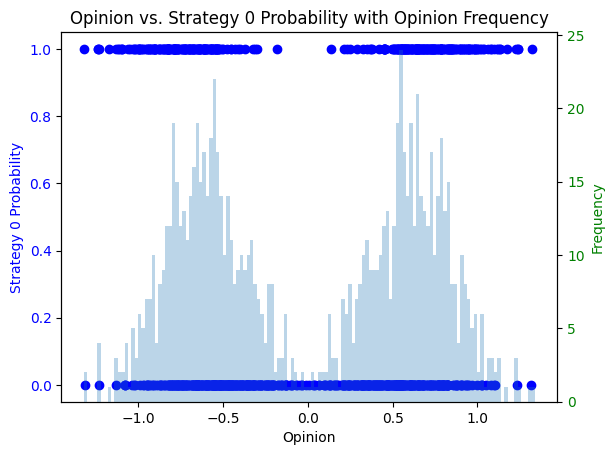

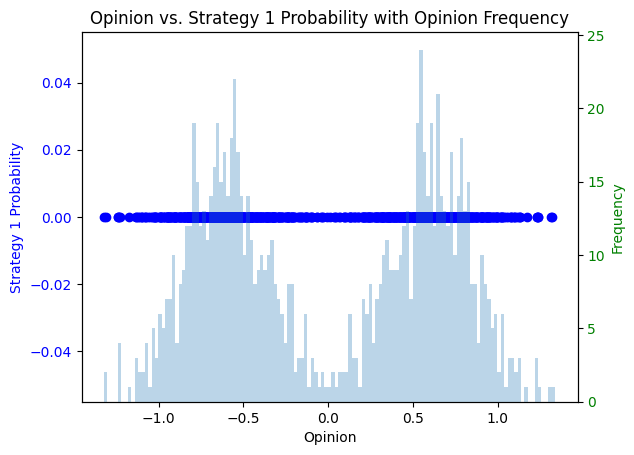

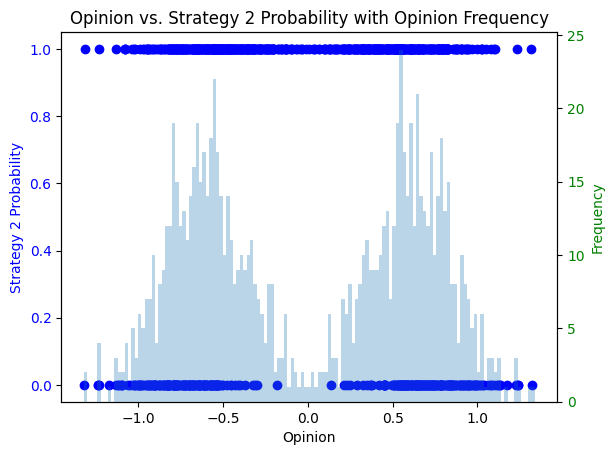

Sim with 0.6


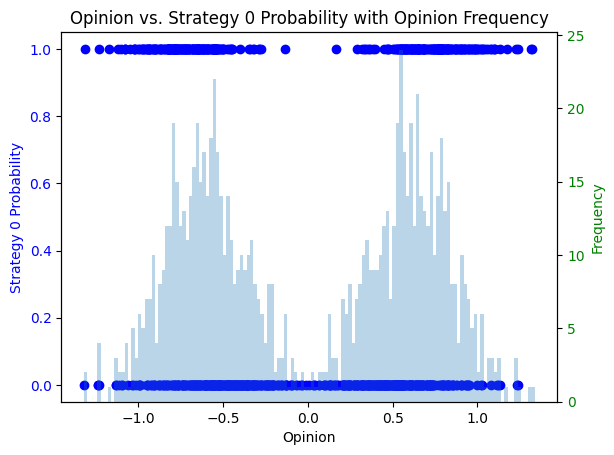

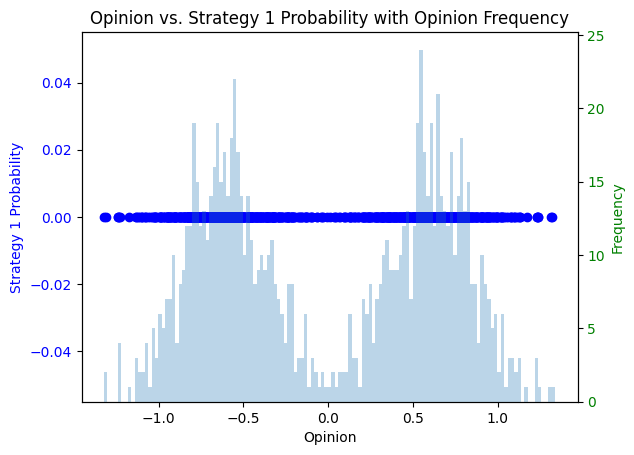

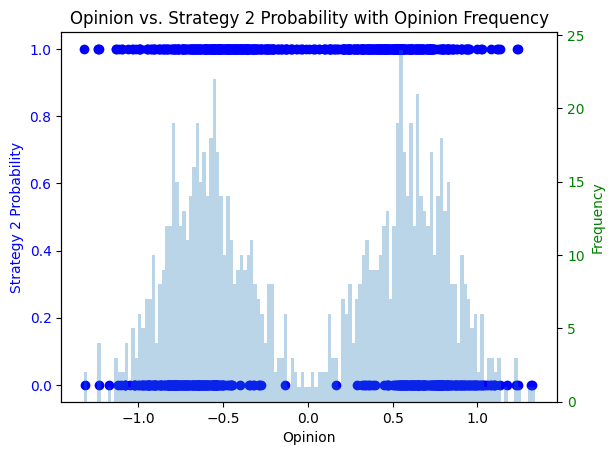

Sim with 0.7


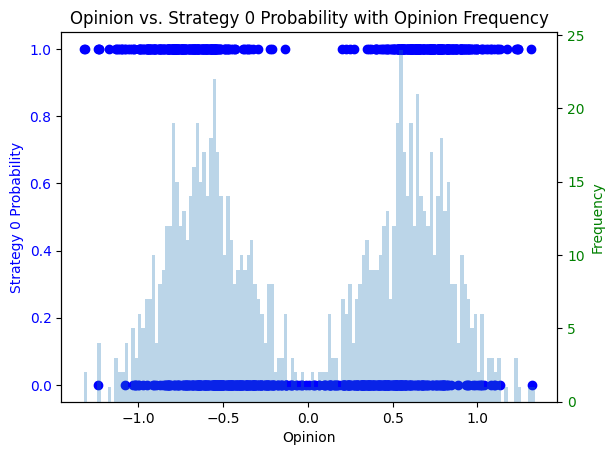

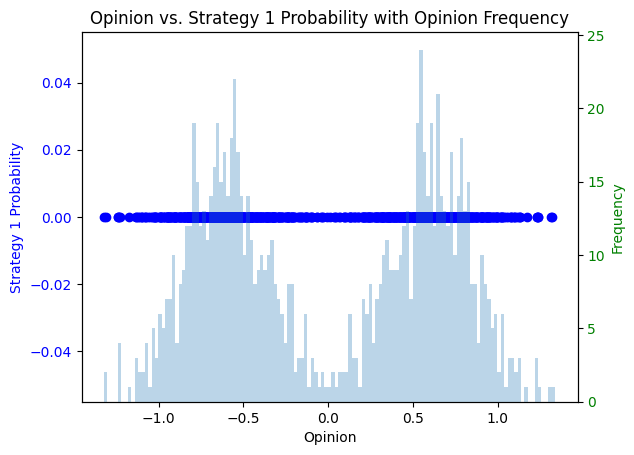

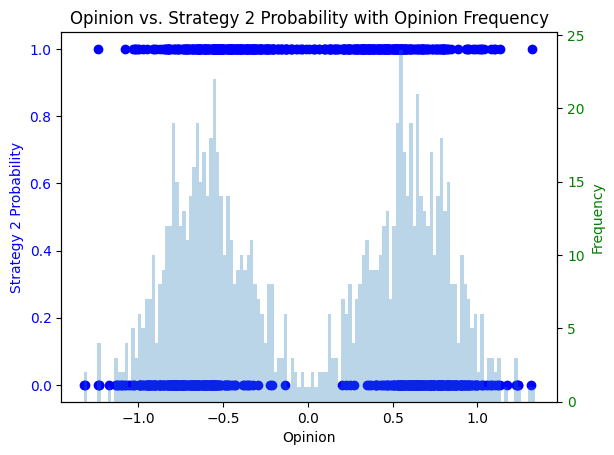

Sim with 0.8


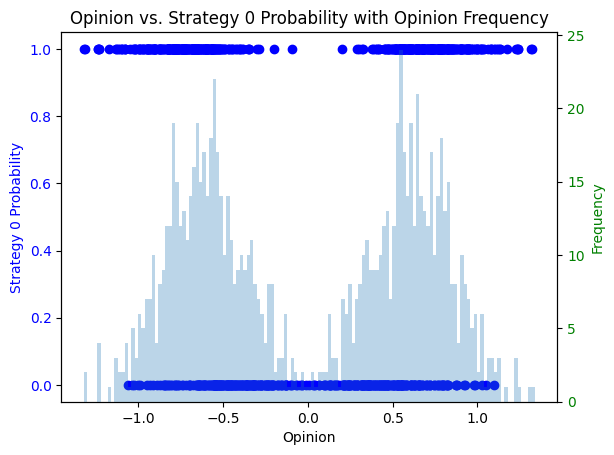

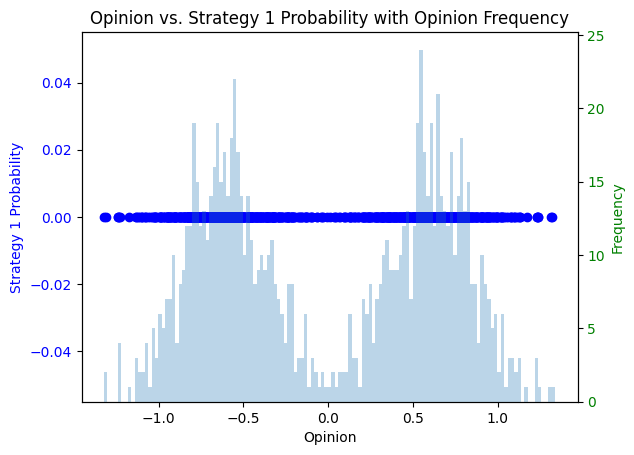

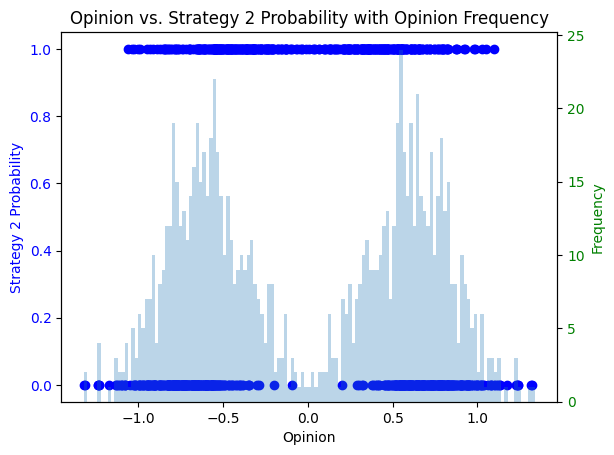

Sim with 0.9


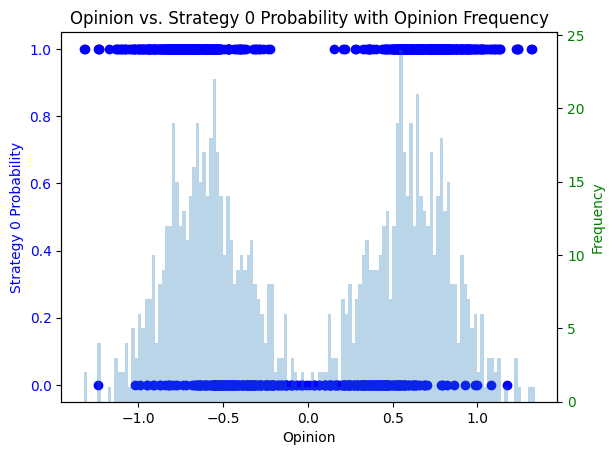

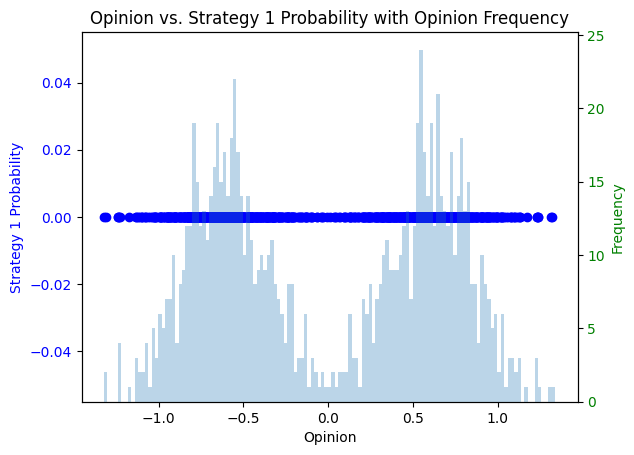

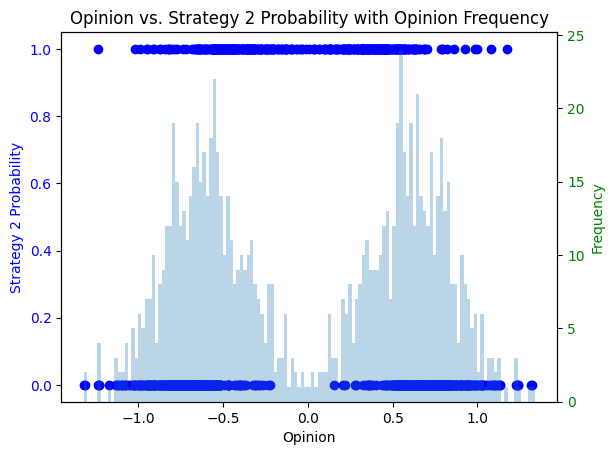

In [13]:
strat_to_threshold = {
        0: 0.01,
        1: 0.01,
        2: 0.95
    }
    
for percent_low, percent_med, percent_high, agents in sim_agents_list:
    print(f"=================================")
    print(f"Sim with ({percent_low, percent_med, percent_high})")
    print(f"=================================")
    for agent in agents.values():
        agent.update_agent_strat_prob_history()
    
    # Sort agents by their opinions
    sorted_agents = sort_agents_by_opinion(agents)
    round_numbers = list(range(len(next(iter(agents.values())).old_strategy_weights)))  # Assuming all have the same round count

    # Assuming `sorted_agents` is a list of tuples and you have access to opinion and strategy probability data
    for strat, threshold in strat_to_threshold.items():  # For each strategy
        opinions = []
        strat_prob = []

        # Collect data for each agent
        for uuid, agent in sorted_agents:
            opinions.append(agent.opinions[0])
            strat_prob.append(agent.agent_strat_prob_history[-1][strat])

        # Create a plot with two y-axes
        fig, ax1 = plt.subplots()

        # Scatter plot on primary y-axis
        ax1.scatter(opinions, strat_prob, color='b')
        # Get range for which everyone is above the threshold
        # is_above_threshold = strat_to_threshold[strat] > 0.5
        # threshold_range = find_max_length_index_range(strat_prob, strat_to_threshold[strat], is_above_threshold)
        # if threshold_range:
        #     start_opinion = opinions[threshold_range[0]]
        #     end_opinion = opinions[threshold_range[1]]
        #     print(f"Opinion Range: [{start_opinion}, {end_opinion}]")  # Printing for verification
        #     y_coord = -40 if is_above_threshold == True else -40
        #     ax1.axvspan(start_opinion, end_opinion, color='y', alpha=0.5)
        #     ax1.annotate(f'Start: {start_opinion:.2f}', (start_opinion, strat_prob[threshold_range[0]]),
        #         xytext=(y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')
        #     ax1.annotate(f'End: {end_opinion:.2f}', (end_opinion, strat_prob[threshold_range[1]]),
        #         xytext=(-y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')


        # ax1.axvline(x=0, color='r', linestyle='--')  # 'r' for red, '--' for dashed line style

        ax1.set_xlabel('Opinion')
        ax1.set_ylabel(f'Strategy {strat} Probability', color='b')
        
        # Create secondary y-axis for the histogram
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.hist(opinions, bins=np.arange(min(opinions), max(opinions) + 0.02, 0.02), alpha=0.3)
        ax2.set_ylabel('Frequency', color='g')

        # Change the tick color and label color to match the plots
        ax1.tick_params(axis='y', labelcolor='b')
        ax2.tick_params(axis='y', labelcolor='g')

        plt.title(f'Opinion vs. Strategy {strat} Probability with Opinion Frequency')
        plt.show()


In [15]:
sim_agents_list[0]

(0.1,
 {'9ece5676-cf15-4e32-a912-7a5240aaa074': <multiplicative_weights_sim.Agent at 0x12ba5f3d0>,
  'd8d1b6e9-9b4f-449b-aa56-697a35832aac': <multiplicative_weights_sim.Agent at 0x129795430>,
  'bb6d4e46-f56d-41b0-95c6-c99f5051f6e3': <multiplicative_weights_sim.Agent at 0x12c7a8df0>,
  'd882eb8d-d6bd-47d9-b511-fd4cdf8f730f': <multiplicative_weights_sim.Agent at 0x1289842e0>,
  '1685fd93-c1fa-44c1-9b3c-a453df81dbd8': <multiplicative_weights_sim.Agent at 0x127fc3f10>,
  '71f6b048-c0ab-4f6e-926a-068b488311a3': <multiplicative_weights_sim.Agent at 0x127342b80>,
  '720557ff-338b-4bb2-8829-99d4766b6bc6': <multiplicative_weights_sim.Agent at 0x10a5027c0>,
  '70e88a0d-bdc9-430b-b32b-4e6ca0c77253': <multiplicative_weights_sim.Agent at 0x12cf15790>,
  'd70774c9-798d-4732-a76c-5bf56a83a41a': <multiplicative_weights_sim.Agent at 0x12d875b50>,
  '81b2b0d7-fbf0-4a8b-9328-3dbdff259b84': <multiplicative_weights_sim.Agent at 0x12e1d8eb0>,
  '45563af2-56cd-49bd-9bb1-74554c56e22f': <multiplicative_weight

In [67]:

percent_low, agents = sim_agents_list[0]
agents_starting_with_indifferent_strat = [agents for agents in agents.values() if agents.agent_strat_prob_history[0][1] > 0.3 and agents.opinions[0] > 0]

In [68]:
len(agents_starting_with_indifferent_strat)

217

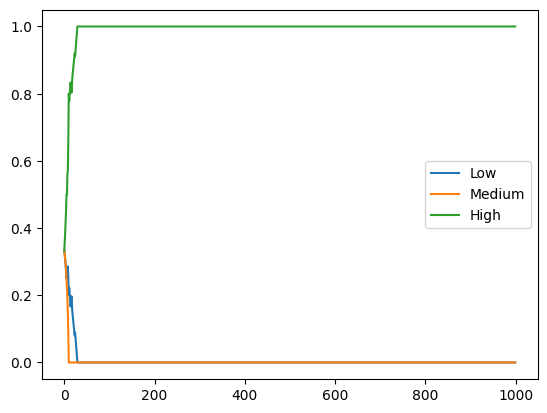

In [69]:
low_probs = [probs[0] for probs in agents_starting_with_indifferent_strat[0].agent_strat_prob_history]
med_probs = [probs[1] for probs in agents_starting_with_indifferent_strat[0].agent_strat_prob_history]
high_probs = [probs[2] for probs in agents_starting_with_indifferent_strat[0].agent_strat_prob_history]

plt.plot(low_probs, label='Low')
plt.plot(med_probs, label='Medium')
plt.plot(high_probs, label='High')
plt.legend()

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go

for percent_low, agents in sim_agents_list:
    print(percent_low)
    # agents_starting_with_indifferent_strat = [agents for agents in agents.values() if agents.agent_strat_prob_history[0][1] > 0.3 and agents.opinions[0] > 0]
    agents_starting_with_indifferent_strat = [agents for agents in agents.values() if agents.opinions[0] > 0]

    print(len(agents_starting_with_indifferent_strat))
    # Assuming you have a list of agents, each with a .opinions attribute and an .agent_strat_prob_history list
    min_opinion = min(agent.opinions[0] for agent in agents_starting_with_indifferent_strat)
    max_opinion = max(agent.opinions[0] for agent in agents_starting_with_indifferent_strat)
    print(f"Min opinion: {min_opinion}, Max opinion: {max_opinion}")

    # Define bins covering the entire range of opinions
    opinion_bins = np.linspace(min_opinion, max_opinion+0.1, num=8)
    bin_indices = np.digitize([agent.opinions[0] for agent in agents_starting_with_indifferent_strat], opinion_bins) - 1

    # Initialize lists to store averaged probabilities
    average_low_probs = [[] for _ in range(len(opinion_bins)-1)]
    average_med_probs = [[] for _ in range(len(opinion_bins)-1)]
    average_high_probs = [[] for _ in range(len(opinion_bins)-1)]

    # Initialize time points
    num_time_points = len(agents_starting_with_indifferent_strat[0].agent_strat_prob_history)

    # Collect probabilities into bins
    bin_probs = {i: { 'low': [], 'med': [], 'high': [] } for i in range(len(opinion_bins)-1)}
    for t in range(num_time_points):
        for agent_index, agent in enumerate(agents_starting_with_indifferent_strat):
            bin = bin_indices[agent_index]
            probs = agent.agent_strat_prob_history[t]
            bin_probs[bin]['low'].append(probs[0])
            bin_probs[bin]['med'].append(probs[1])
            bin_probs[bin]['high'].append(probs[2])

        for bin in bin_probs:
            if bin_probs[bin]['low']:  # Check to avoid division by zero
                average_low_probs[bin].append(np.mean(bin_probs[bin]['low']))
                average_med_probs[bin].append(np.mean(bin_probs[bin]['med']))
                average_high_probs[bin].append(np.mean(bin_probs[bin]['high']))

    # Plot using Plotly
    fig = go.Figure()
    for bin in range(len(opinion_bins)-1):
        fig.add_trace(go.Scatter(
            x=list(range(num_time_points)),
            y=average_low_probs[bin],
            mode='lines',
            name=f'Opinion {opinion_bins[bin]:.2f}-{opinion_bins[bin+1]:.2f})'
        ))

    # Update layout with titles and labels
    fig.update_layout(
        title='Low Strategy Probabilities Over Time by Opinion Range',
        xaxis_title='Time',
        yaxis_title='Average Probability of High Strategy',
        legend_title='Opinion Ranges'
    )

    # Add interactivity features
    # fig.update_layout(hovermode='x unified')
    fig.show()


0.1
500
Min opinion: 0.0092940183215773, Max opinion: 1.3219511875130991


0.2
500
Min opinion: 0.0092940183215773, Max opinion: 1.3219511875130991


0.3
500
Min opinion: 0.0092940183215773, Max opinion: 1.3219511875130991


0.4
500
Min opinion: 0.0092940183215773, Max opinion: 1.3219511875130991


0.5
500
Min opinion: 0.0092940183215773, Max opinion: 1.3219511875130991


0.6
500
Min opinion: 0.0092940183215773, Max opinion: 1.3219511875130991


0.7
500
Min opinion: 0.0092940183215773, Max opinion: 1.3219511875130991


0.8
500
Min opinion: 0.0092940183215773, Max opinion: 1.3219511875130991


0.9
500
Min opinion: 0.0092940183215773, Max opinion: 1.3219511875130991


: 

Sim with 0.1


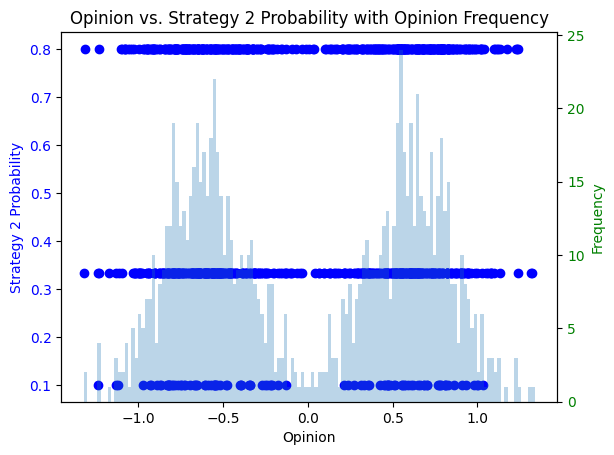

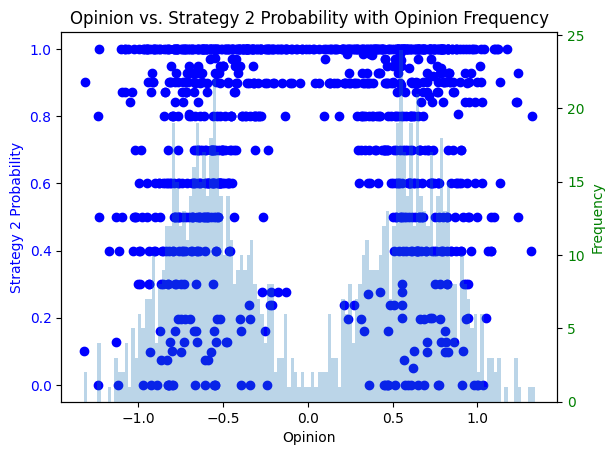

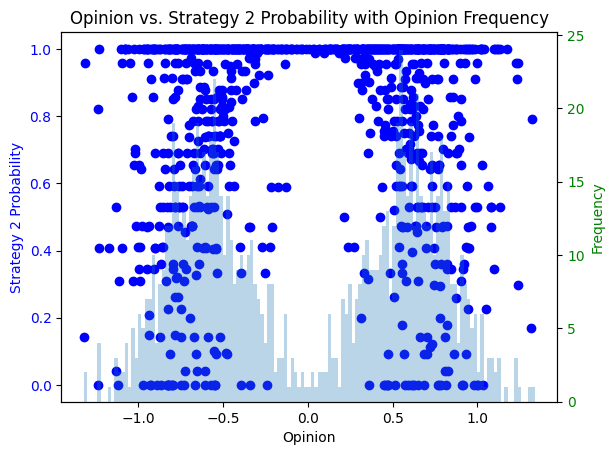

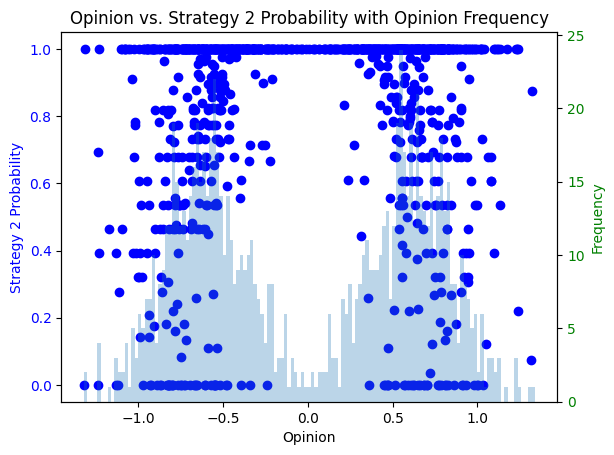

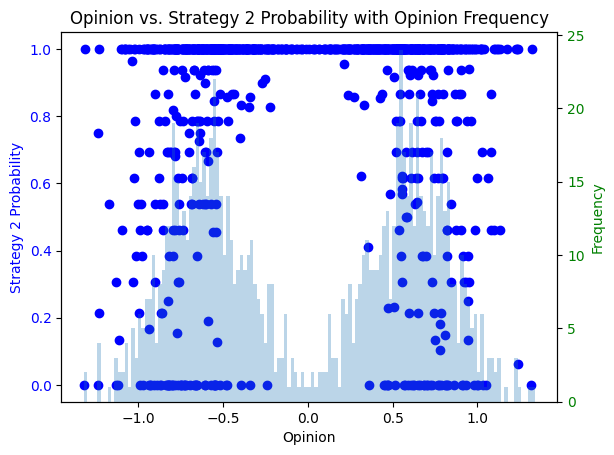

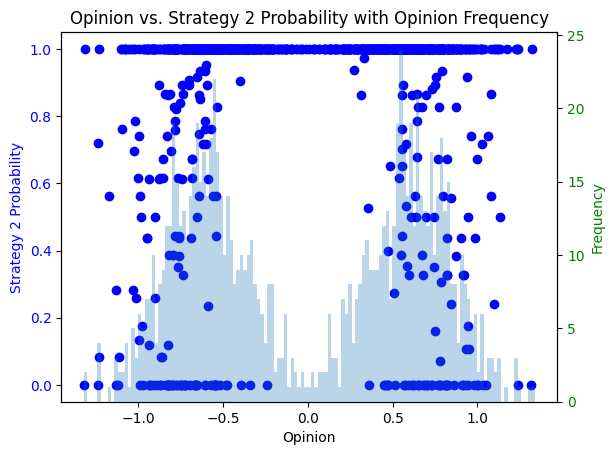

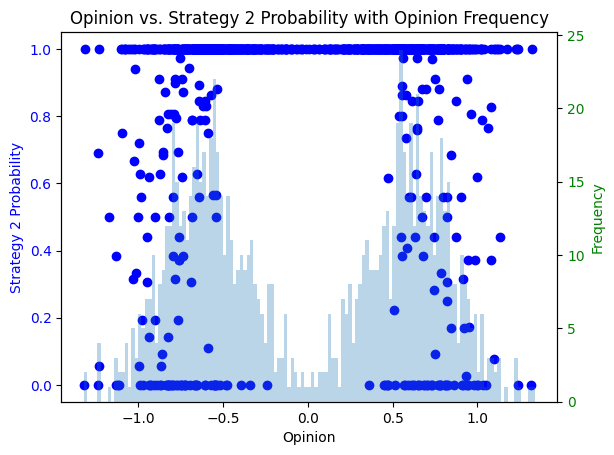

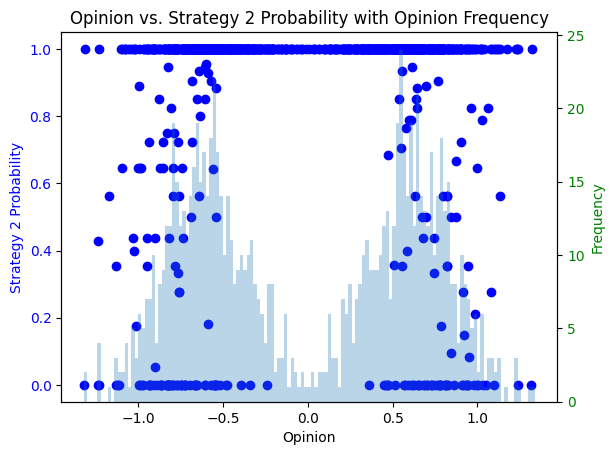

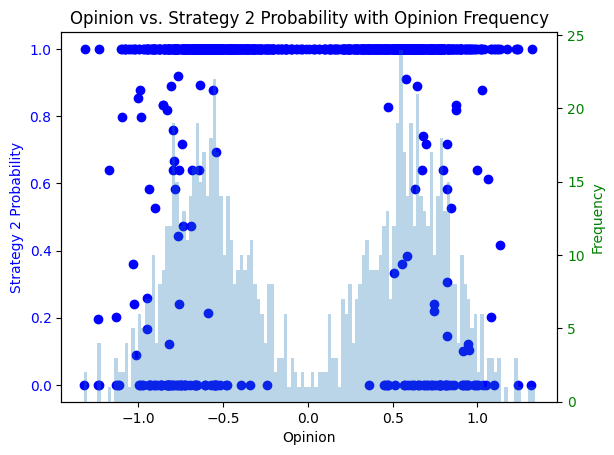

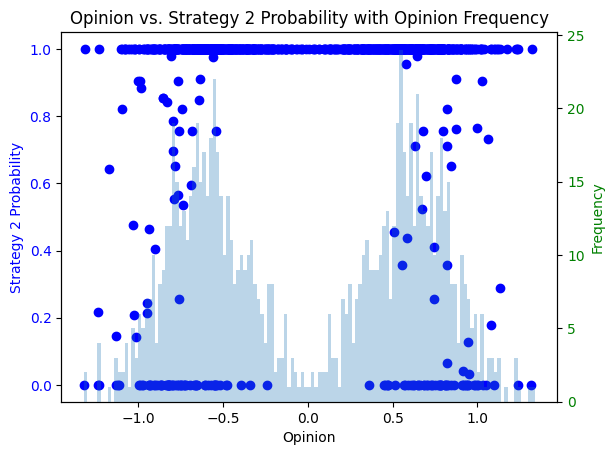

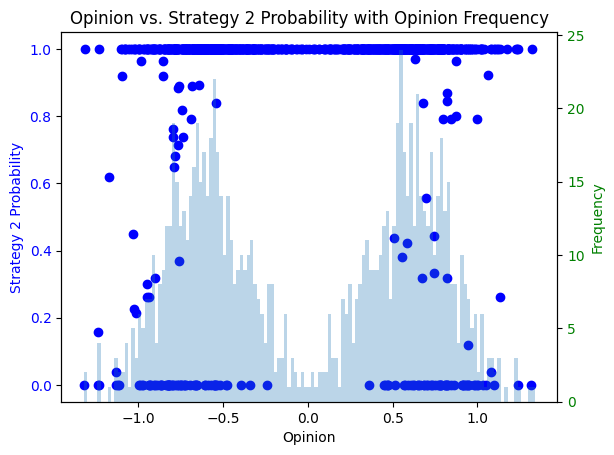

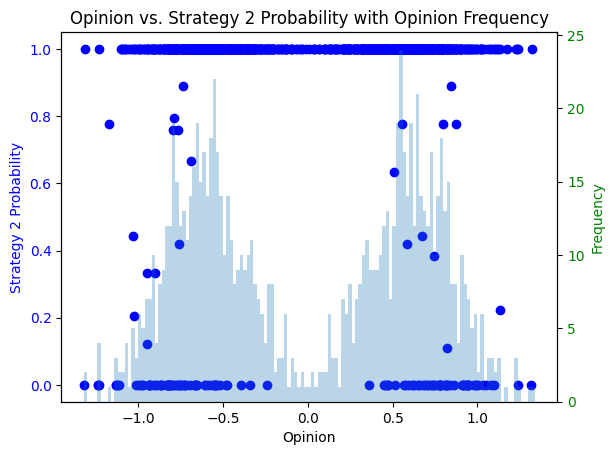

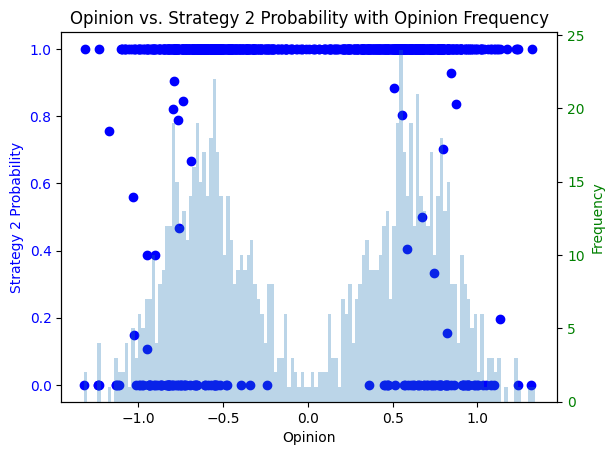

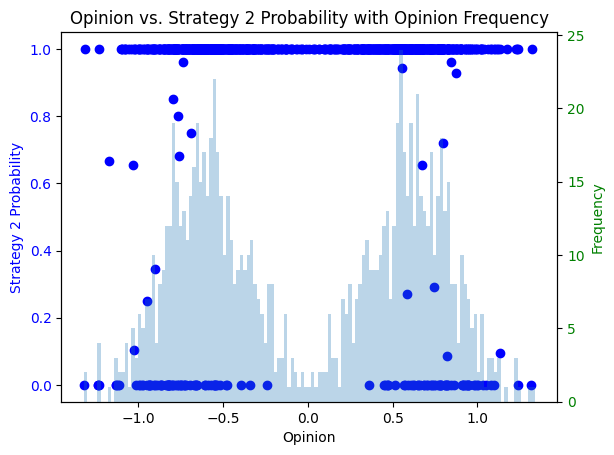

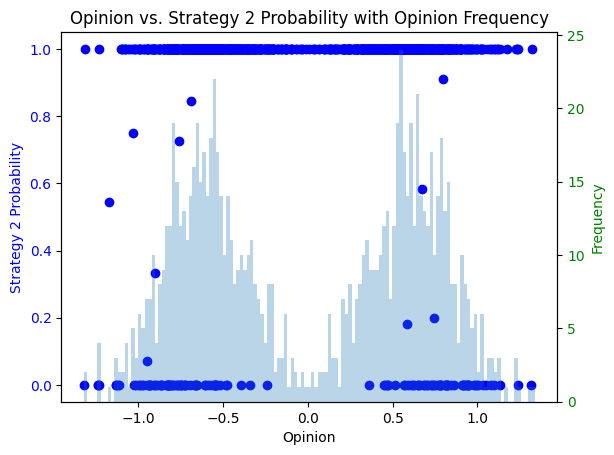

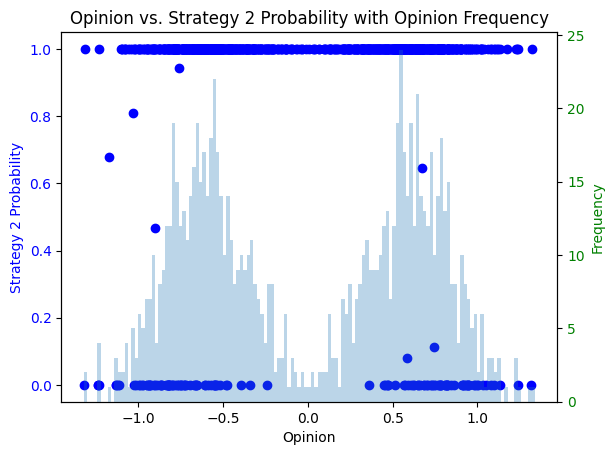

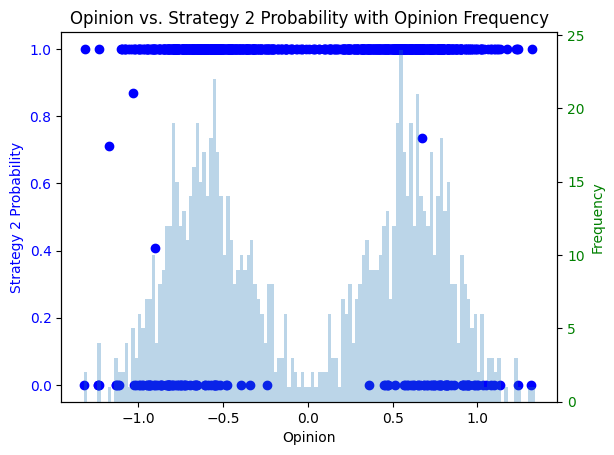

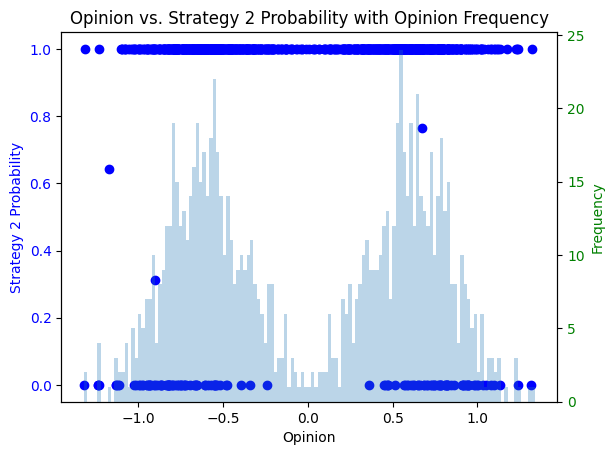

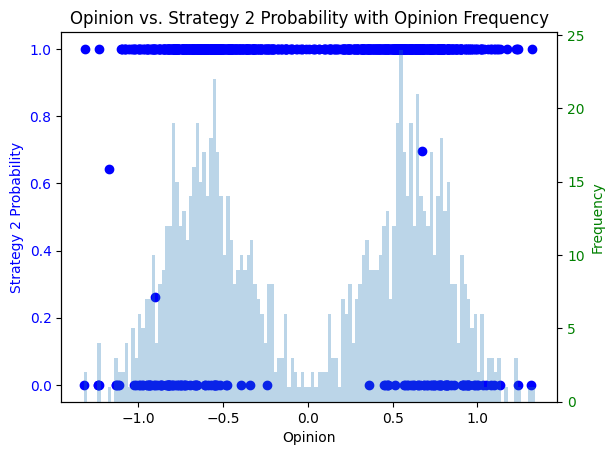

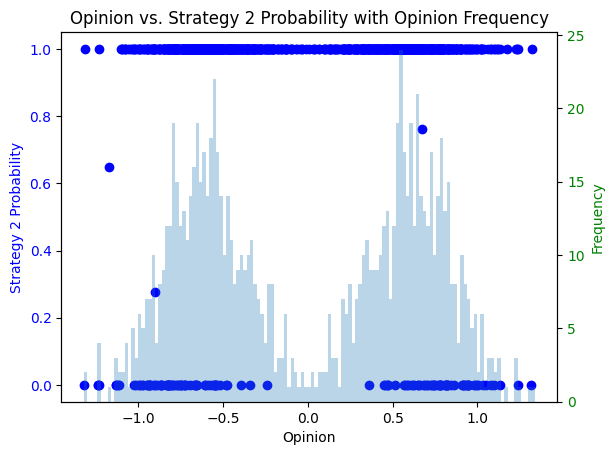

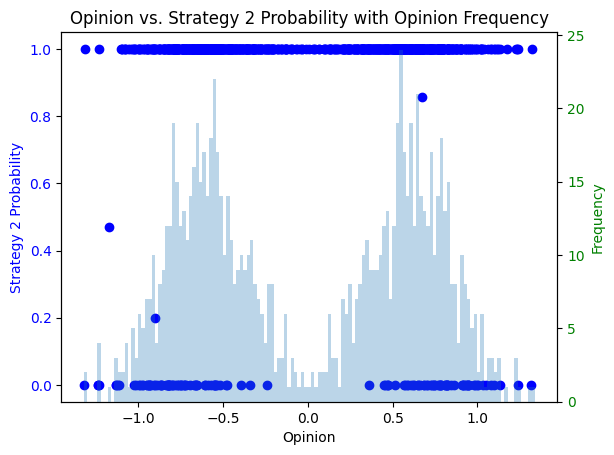

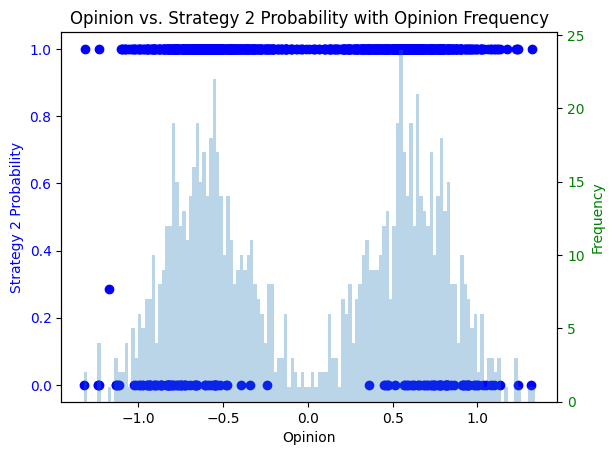

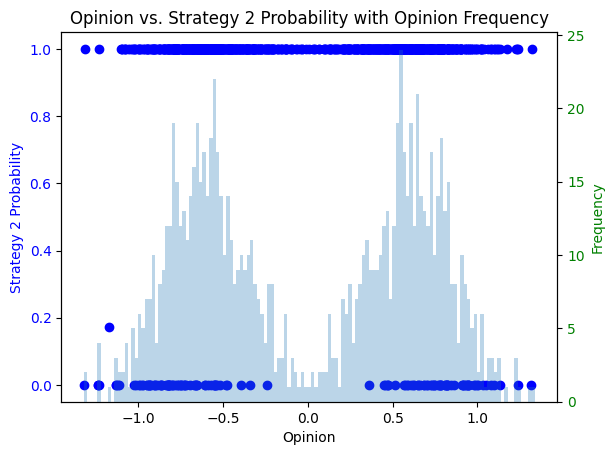

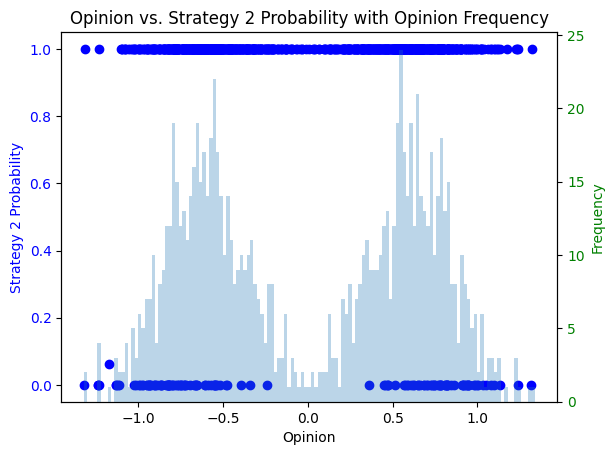

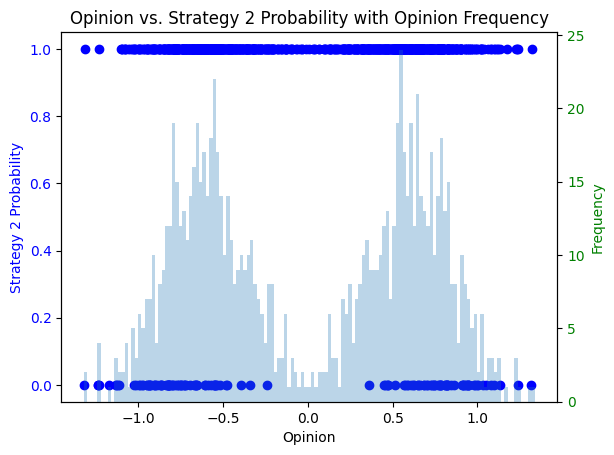

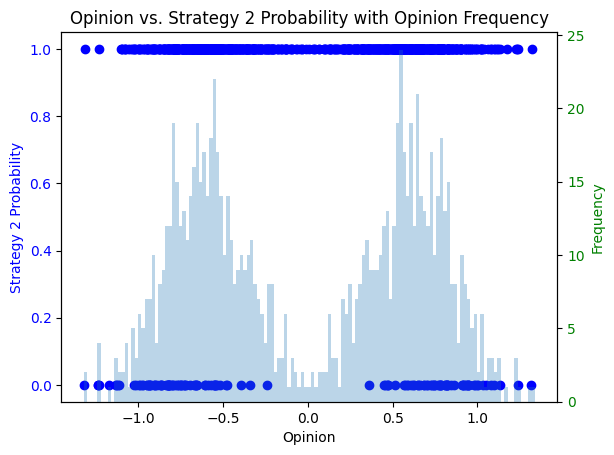

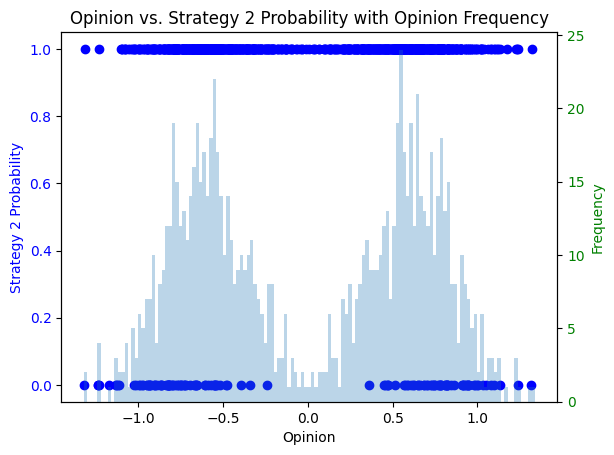

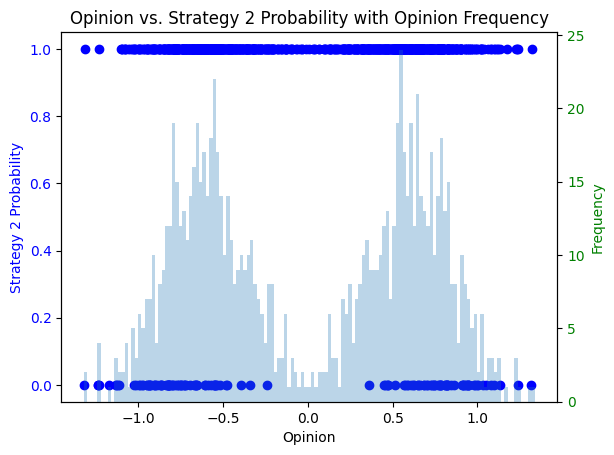

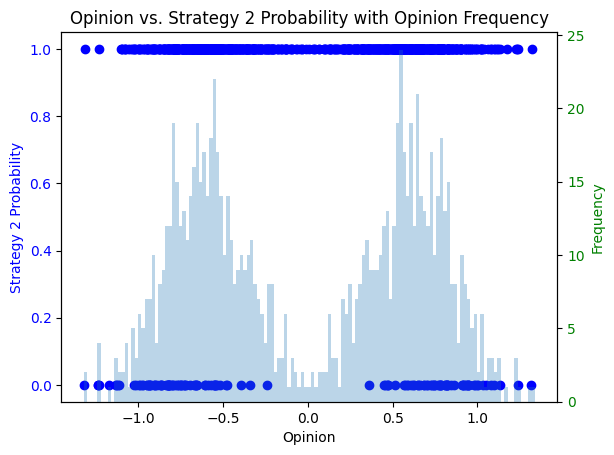

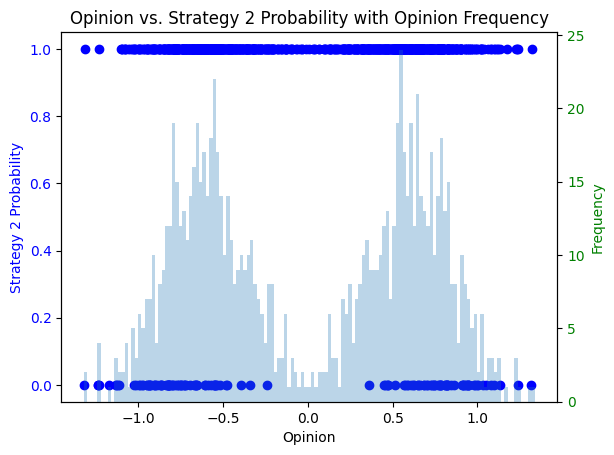

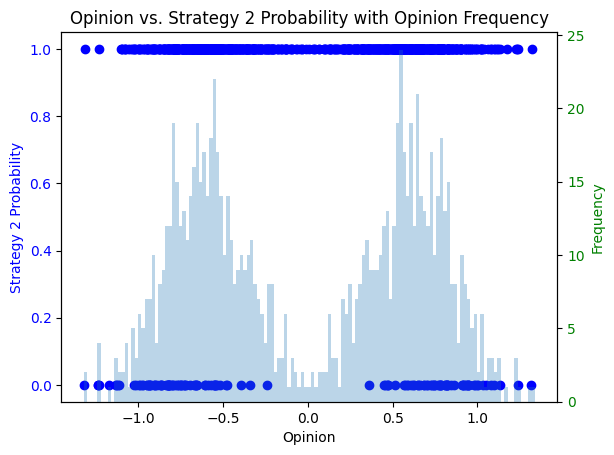

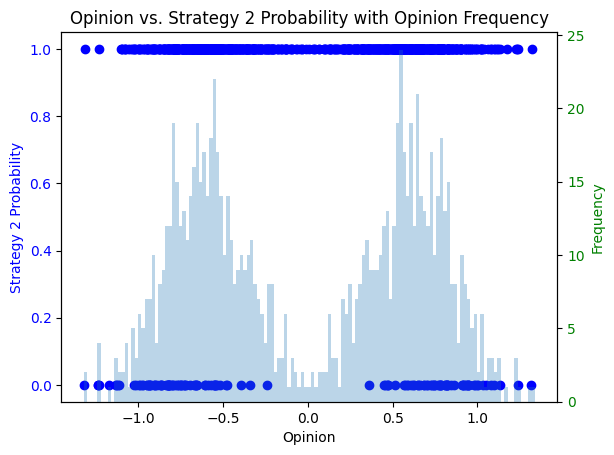

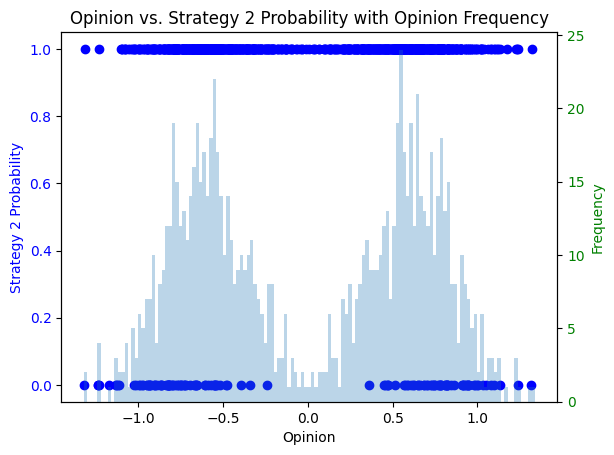

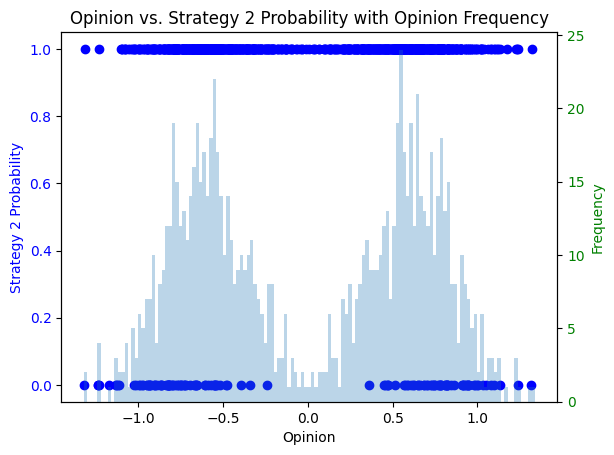

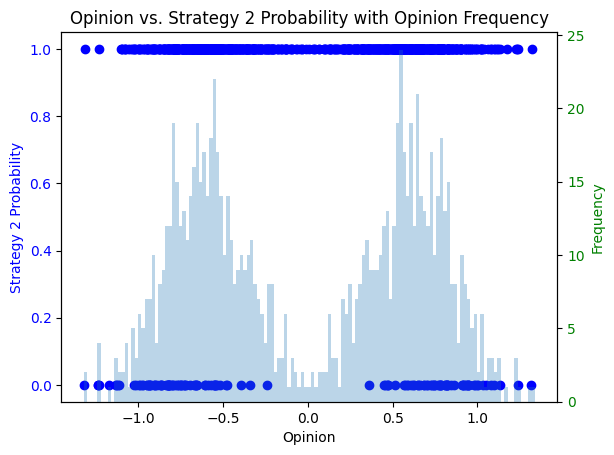

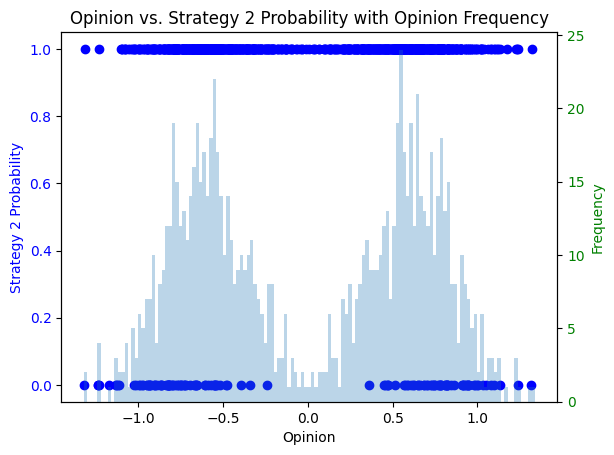

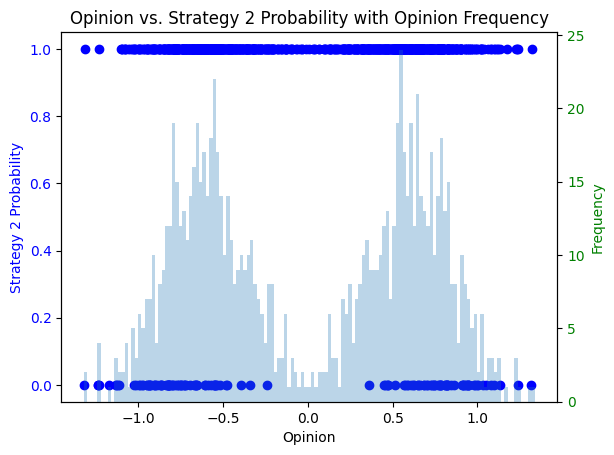

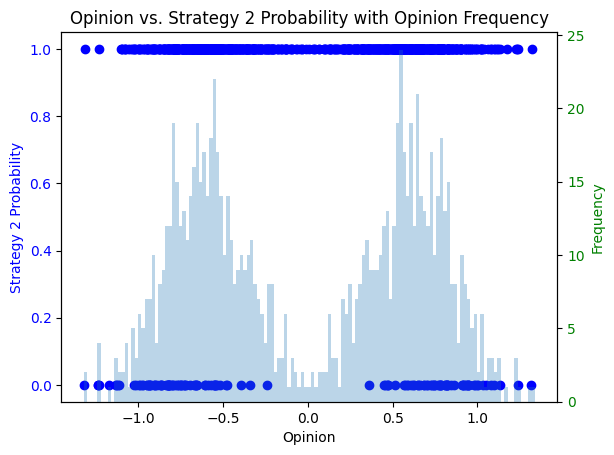

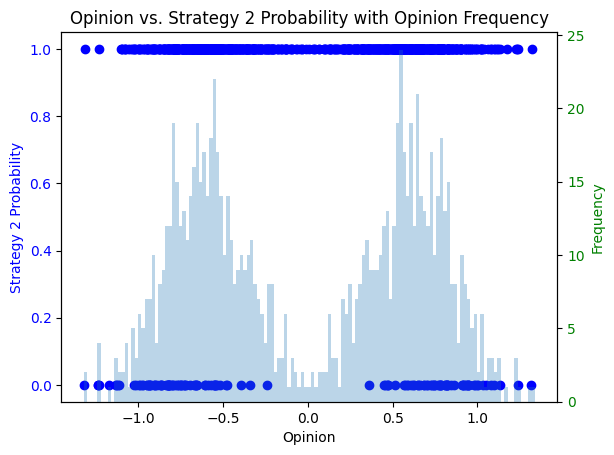

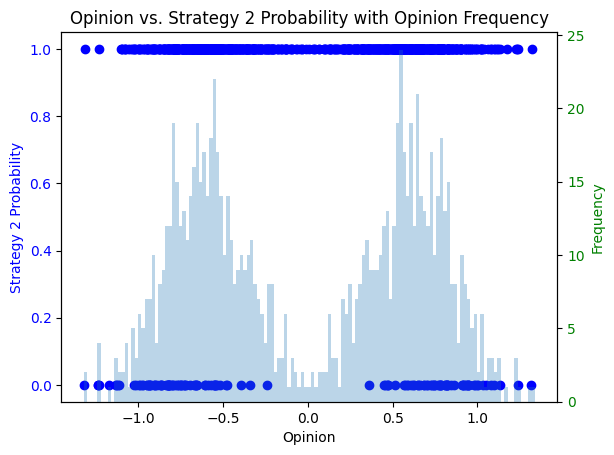

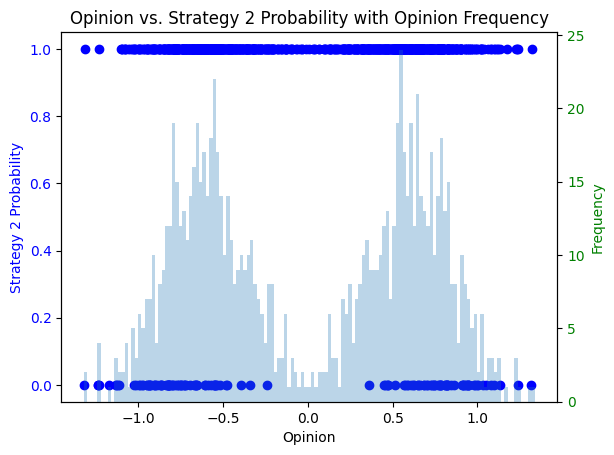

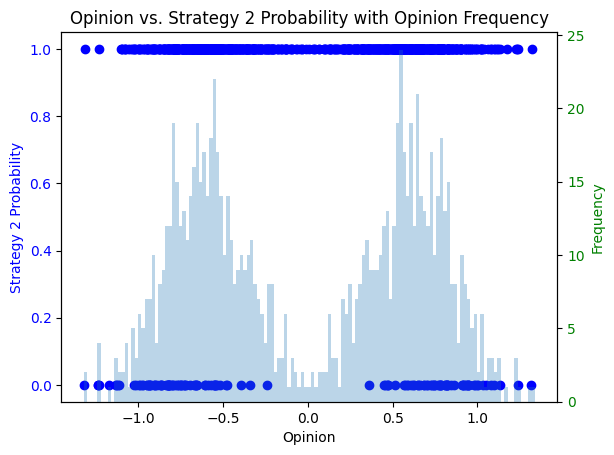

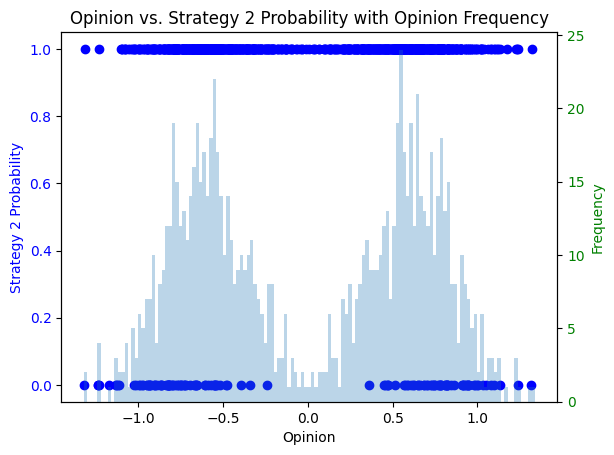

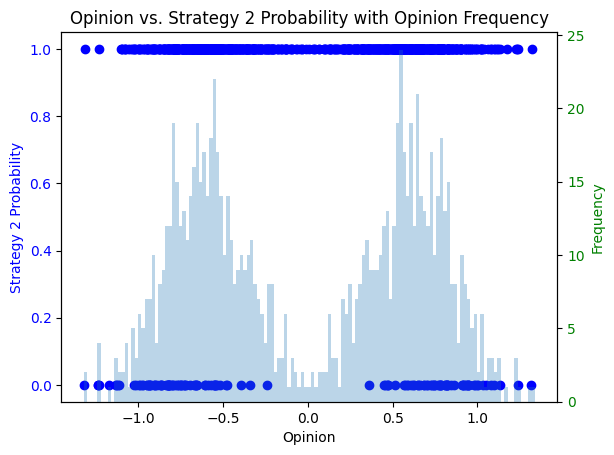

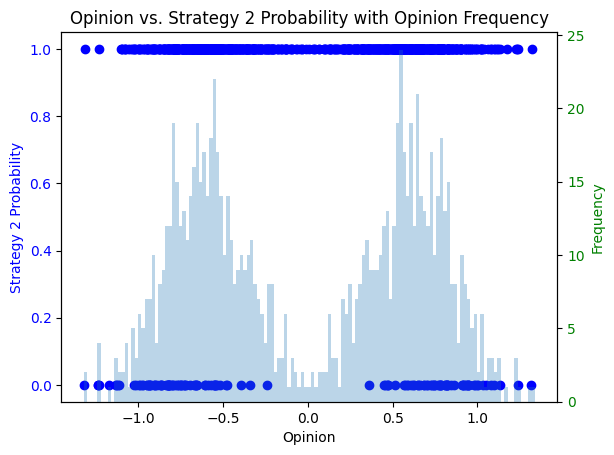

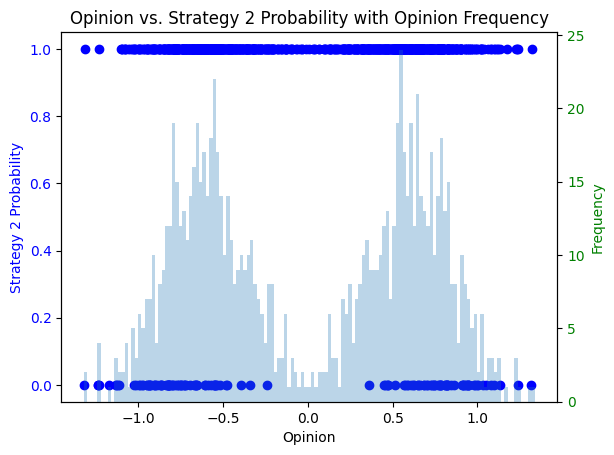

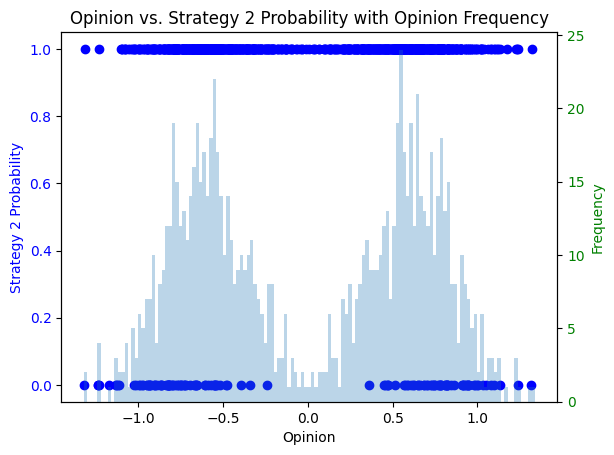

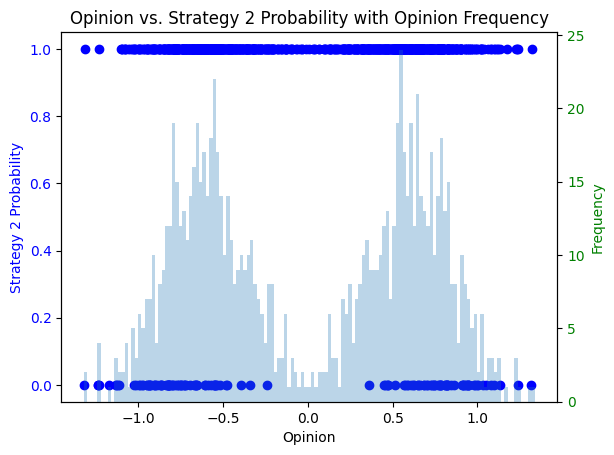

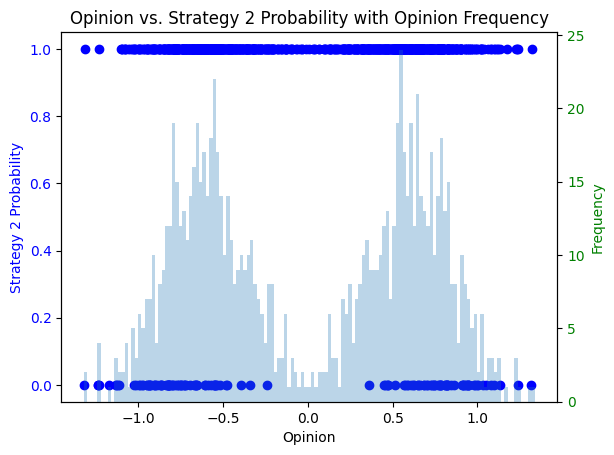

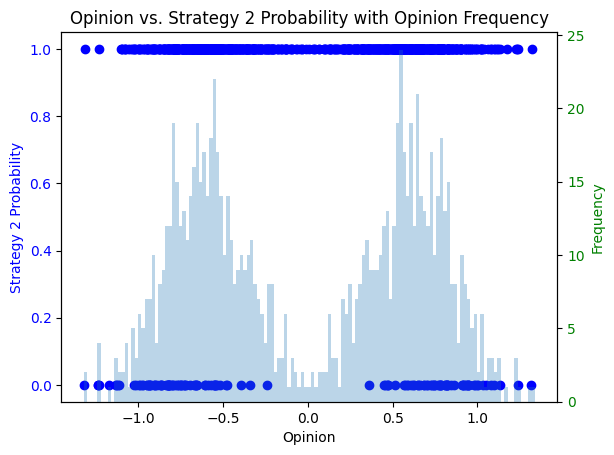

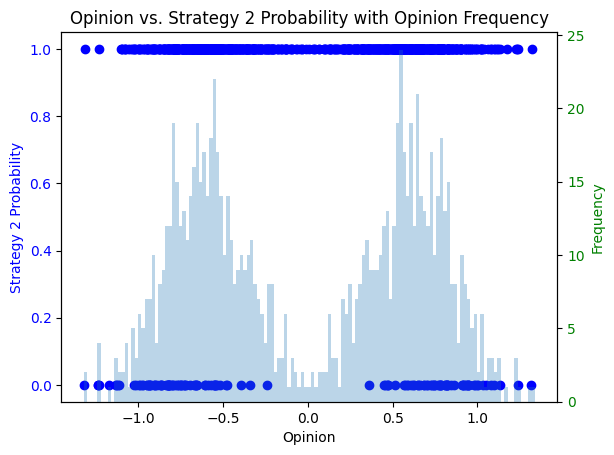

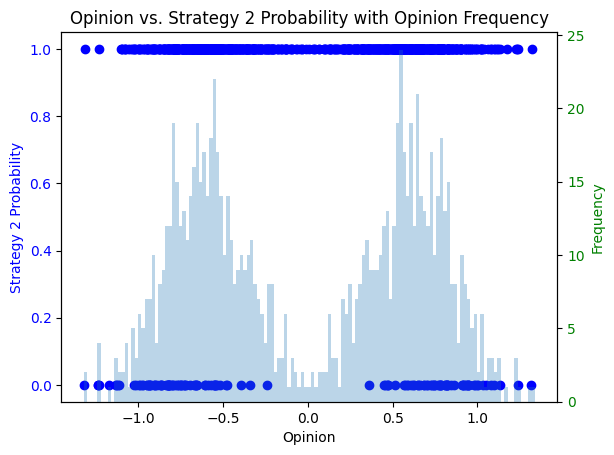

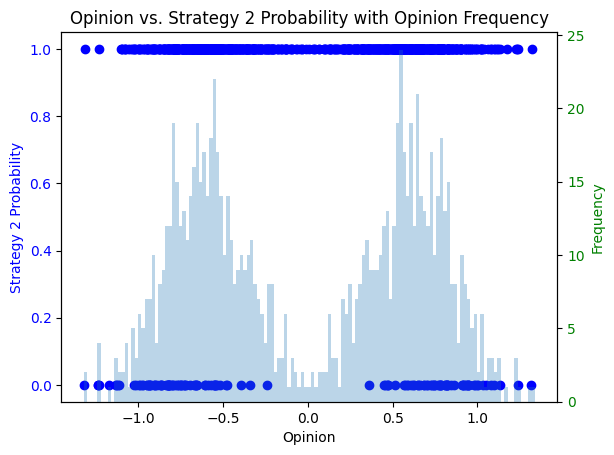

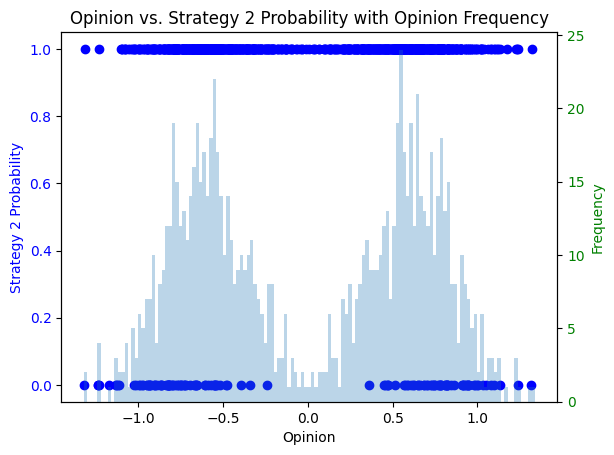

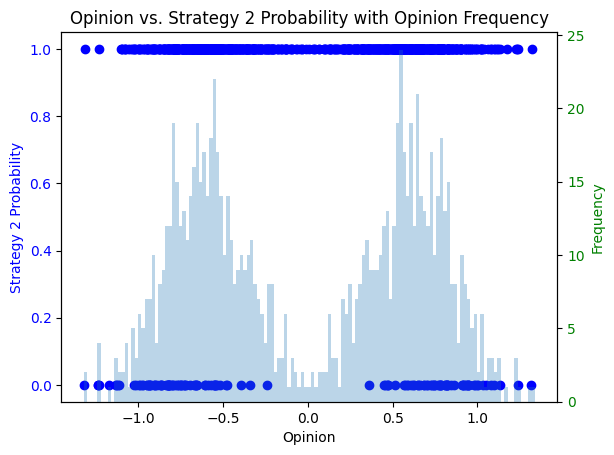

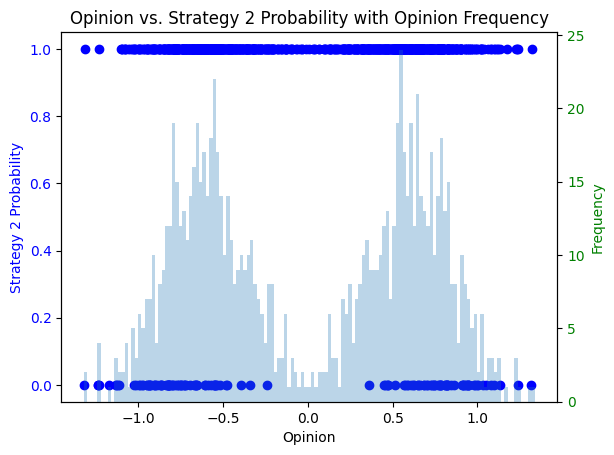

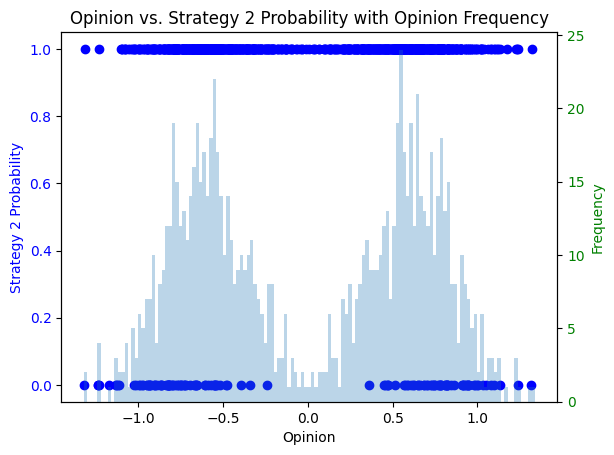

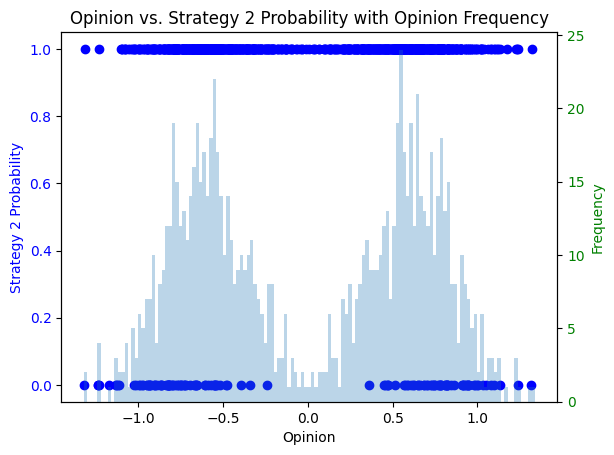

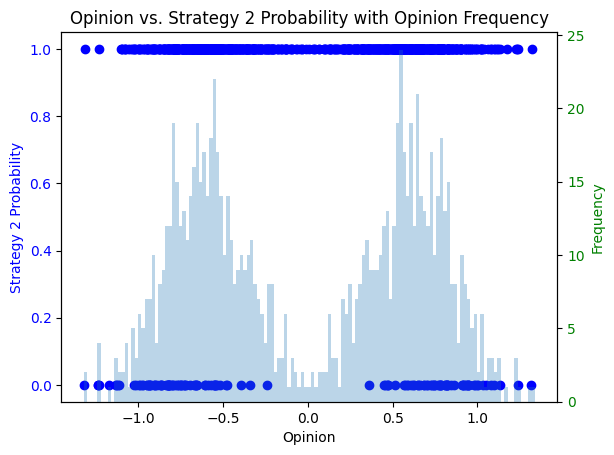

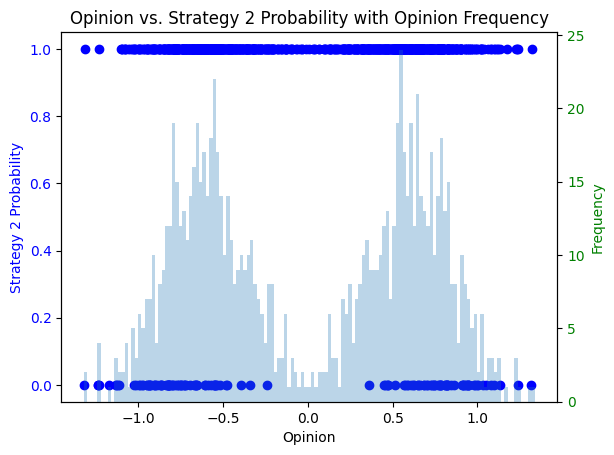

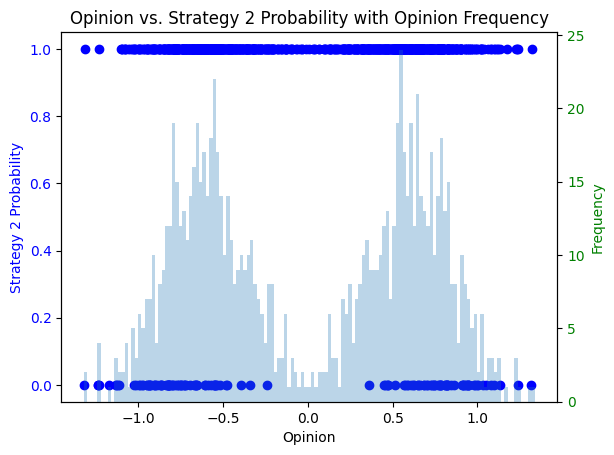

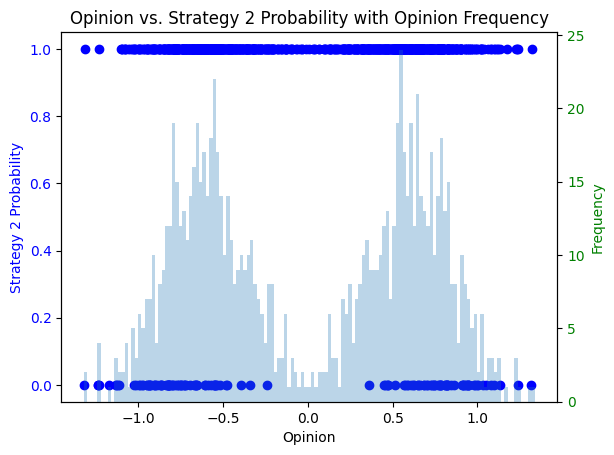

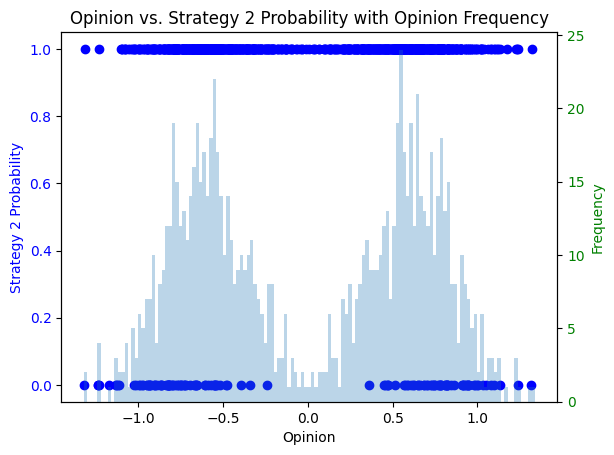

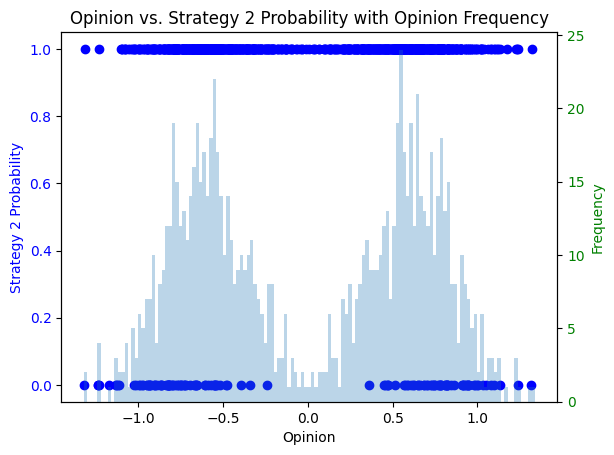

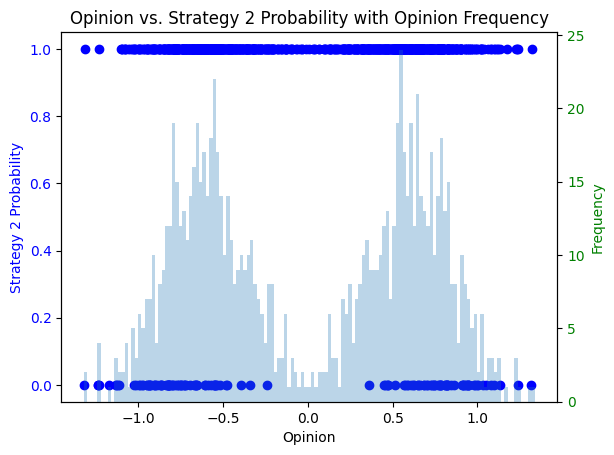

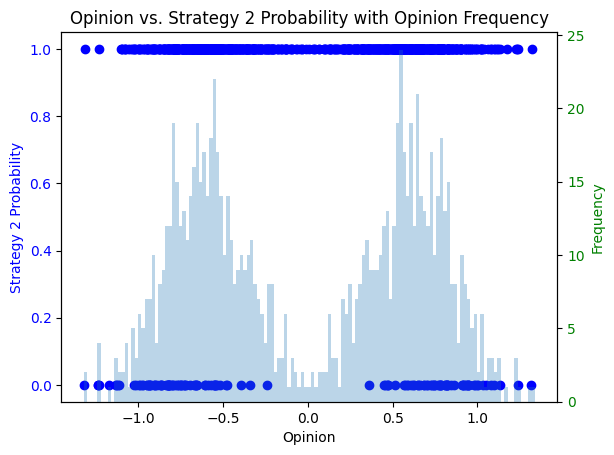

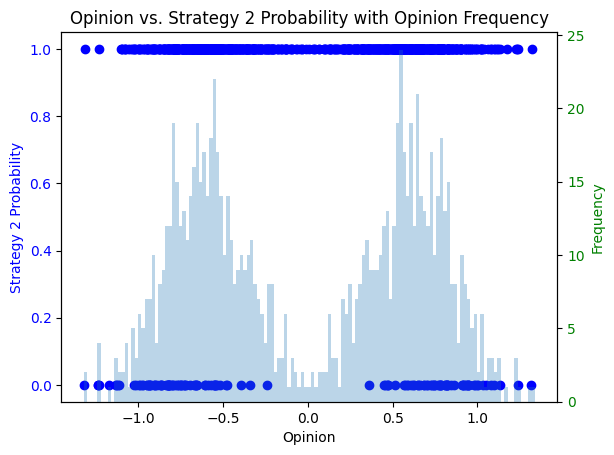

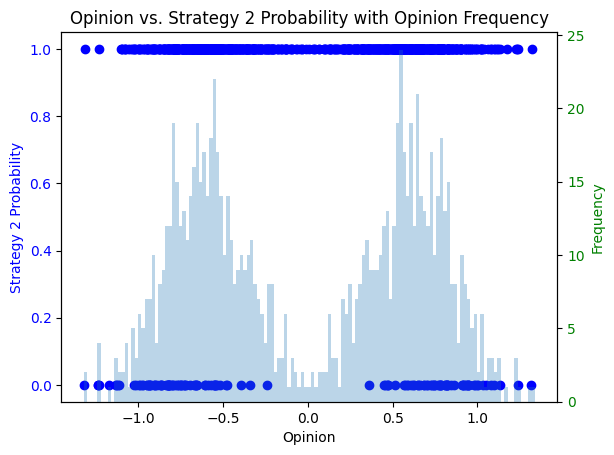

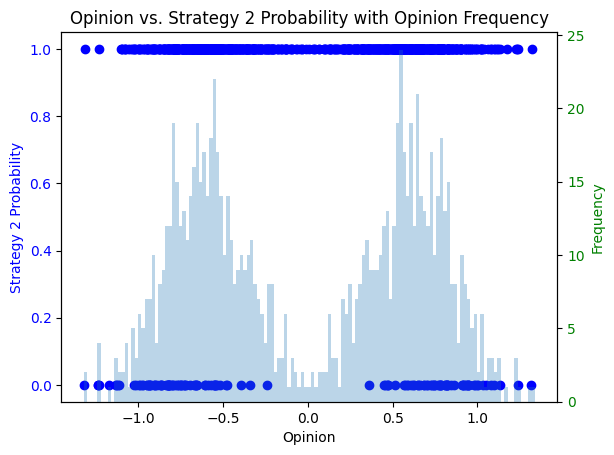

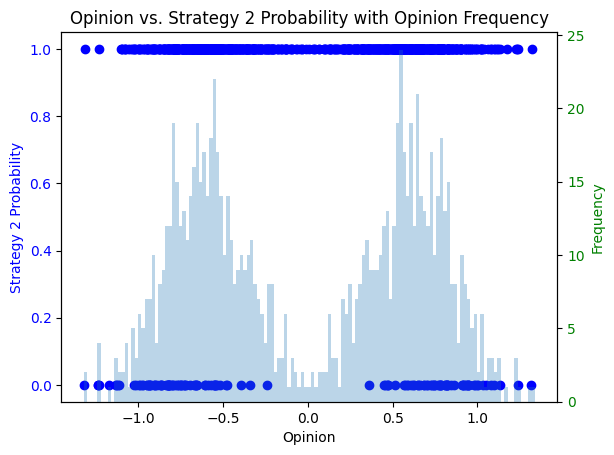

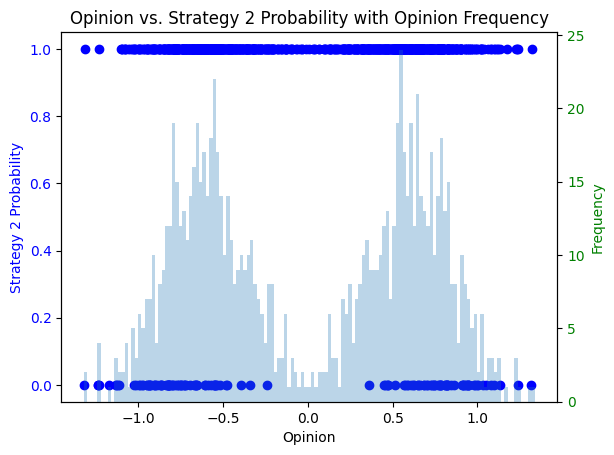

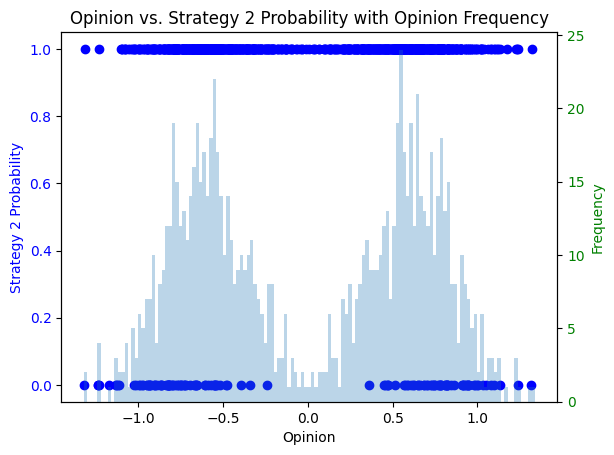

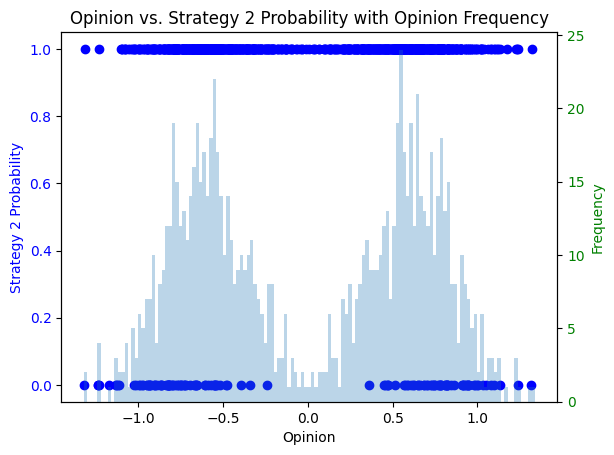

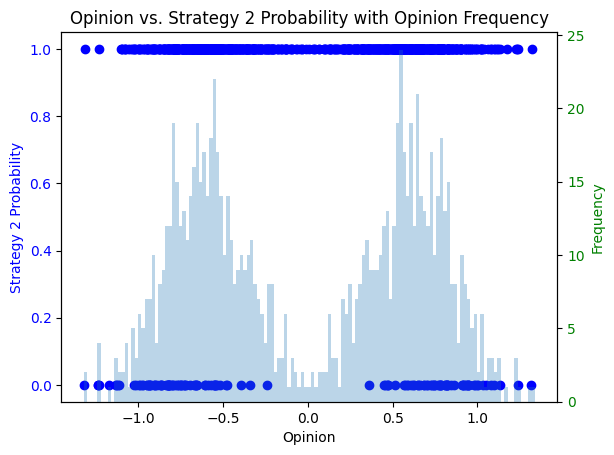

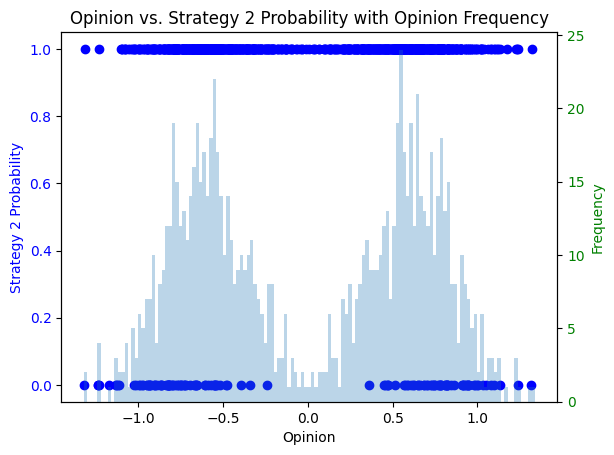

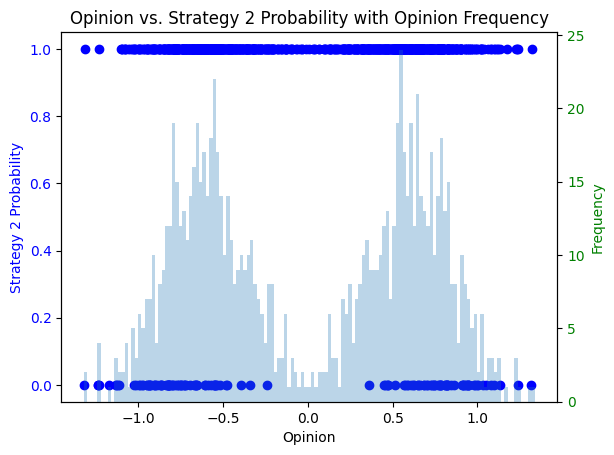

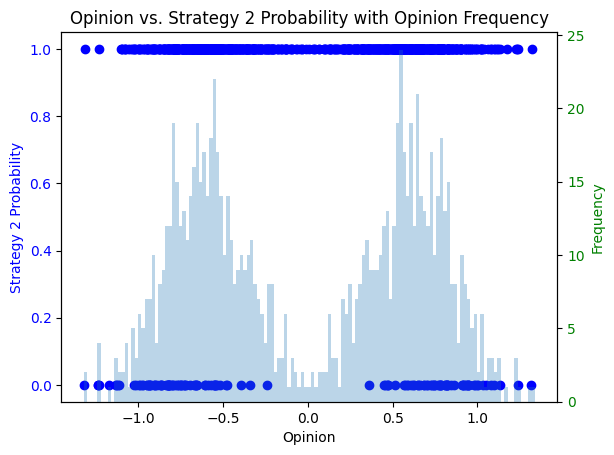

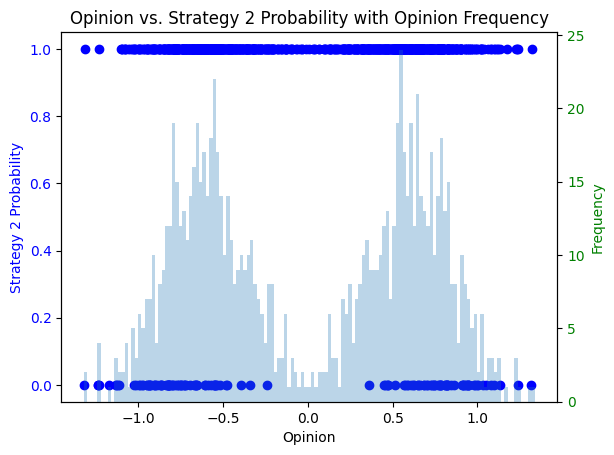

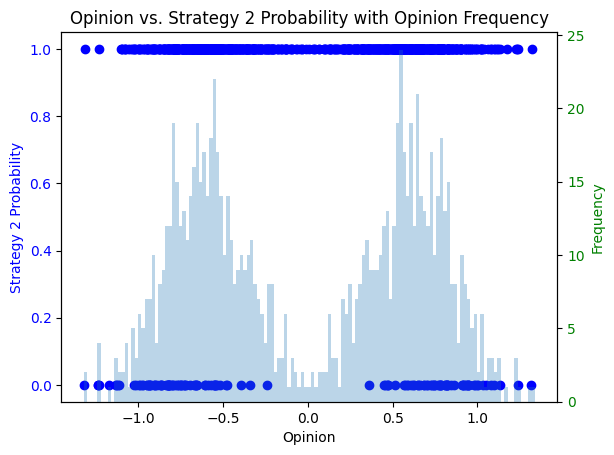

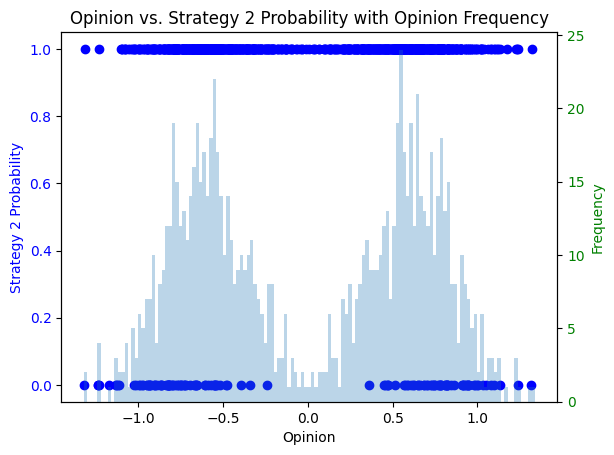

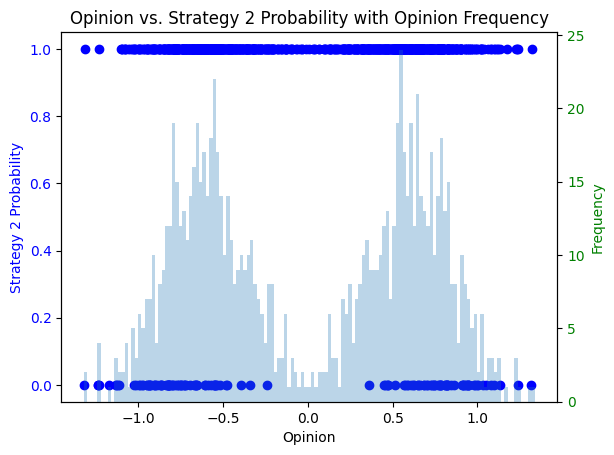

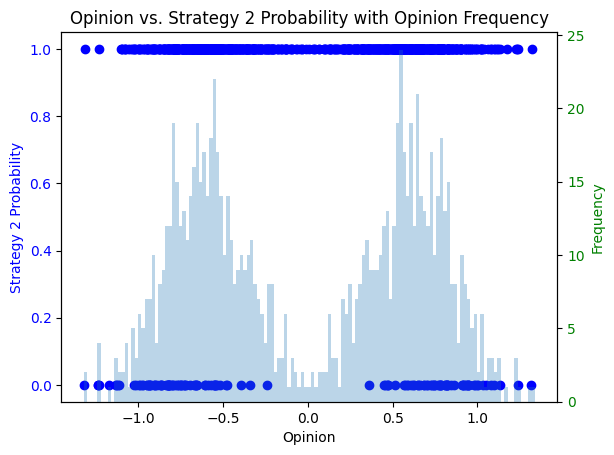

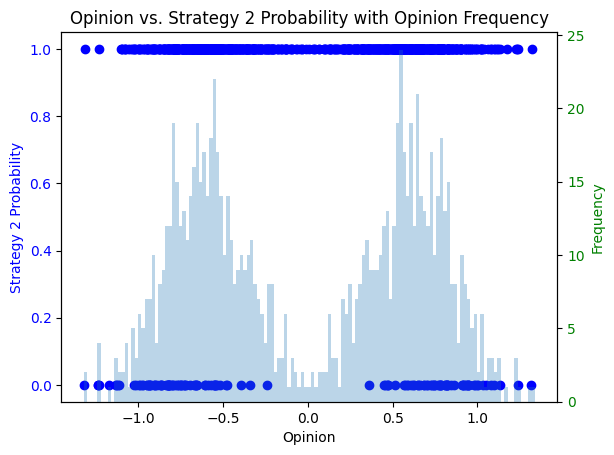

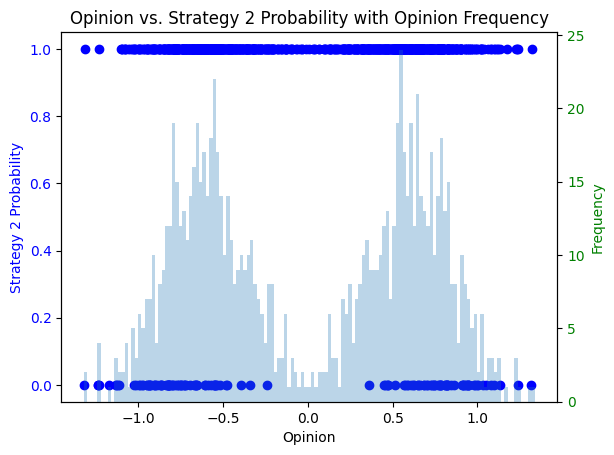

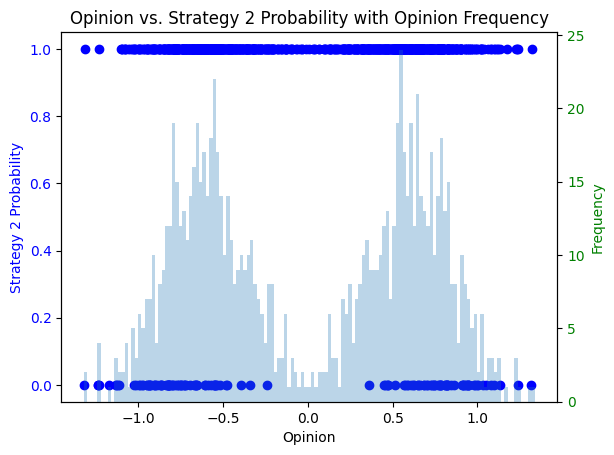

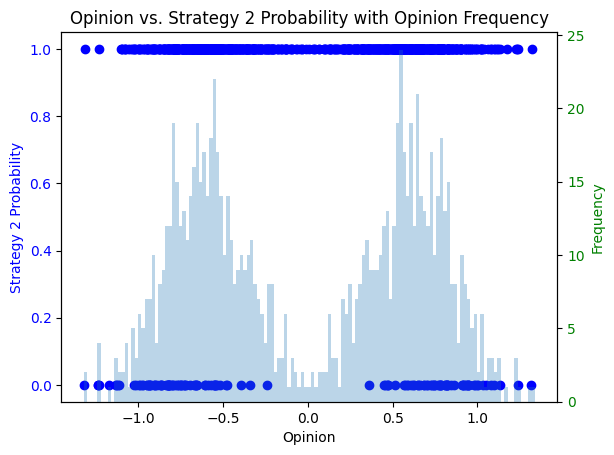

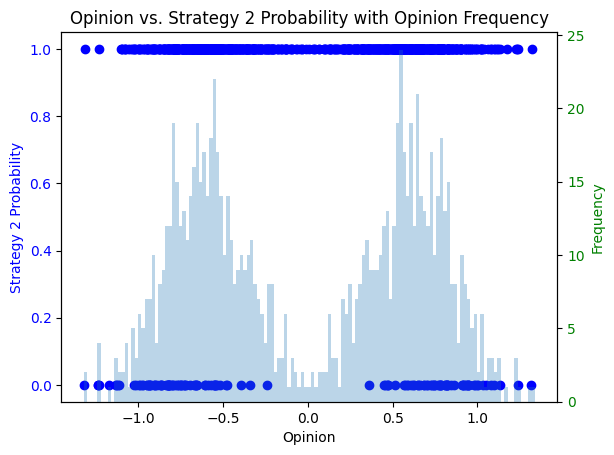

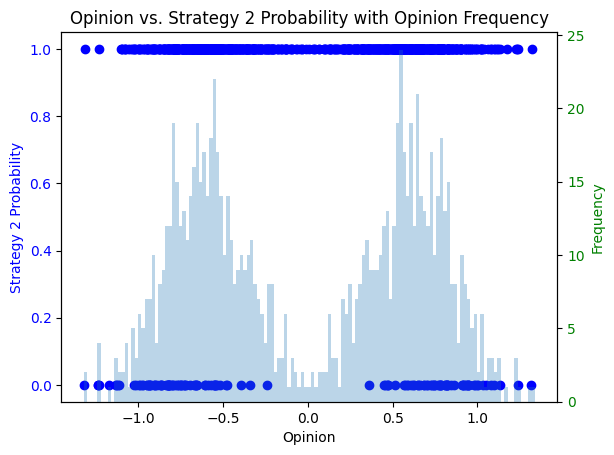

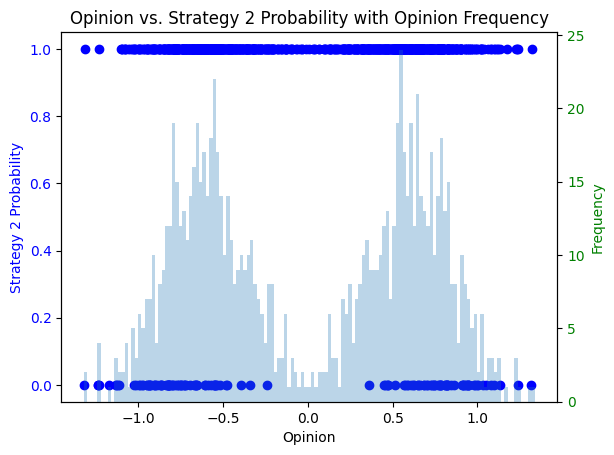

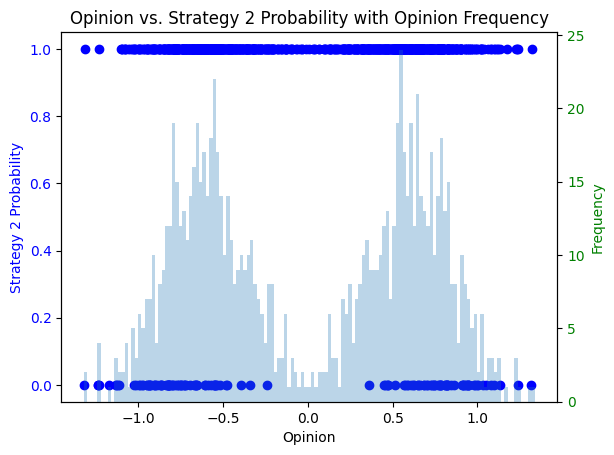

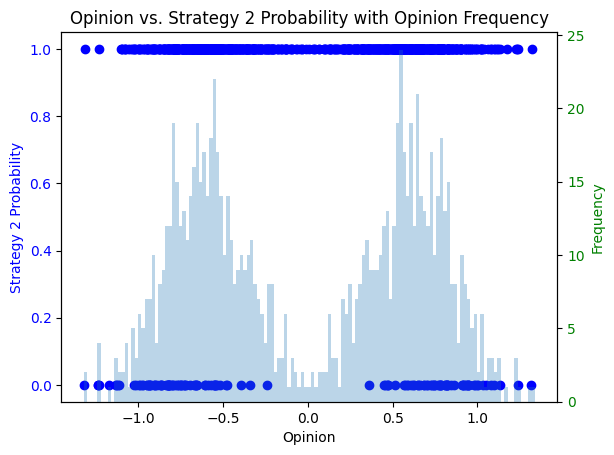

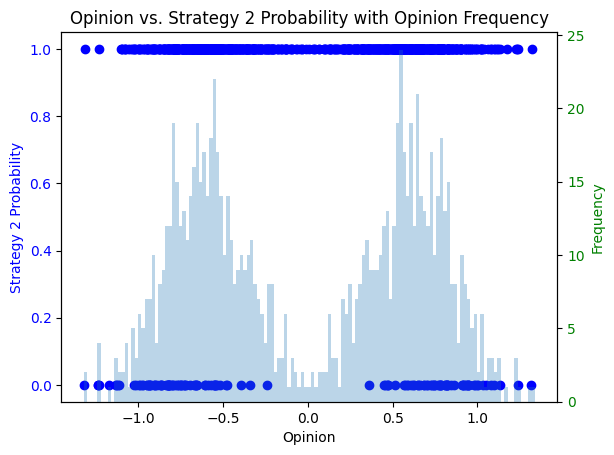

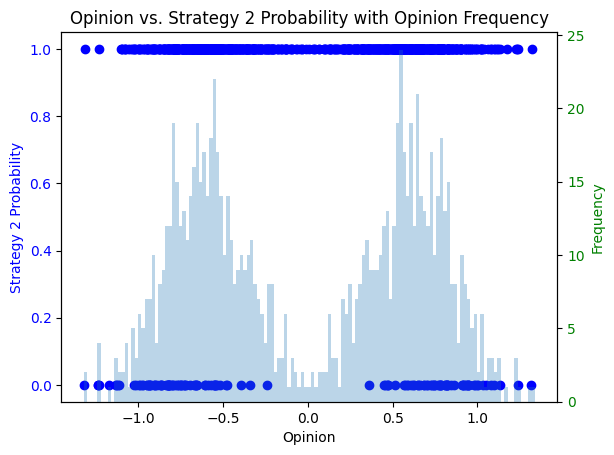

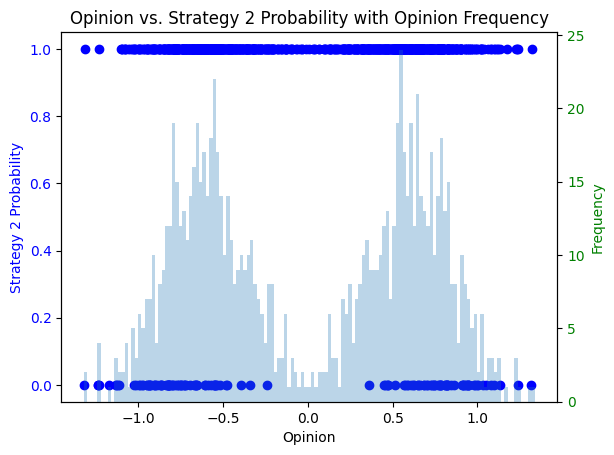

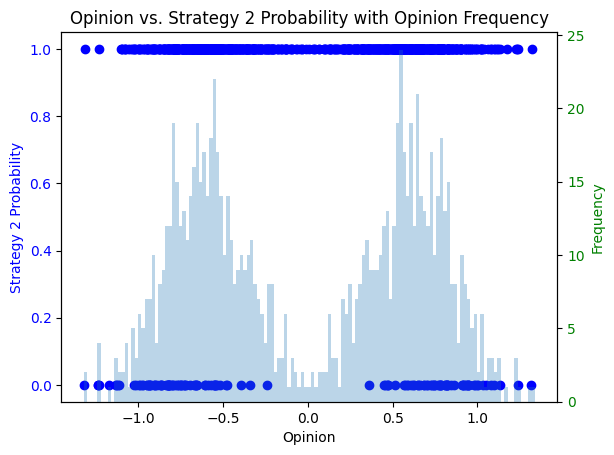

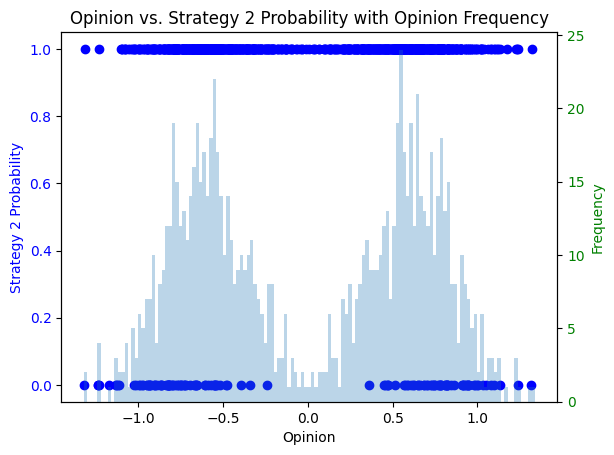

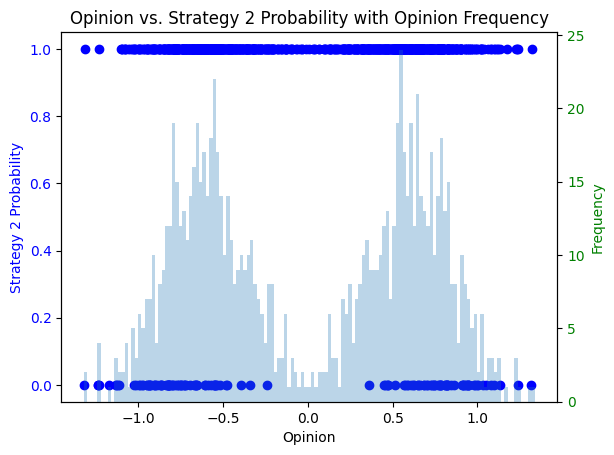

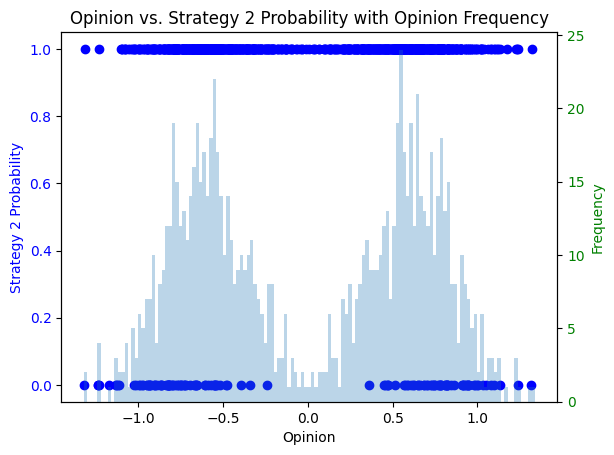

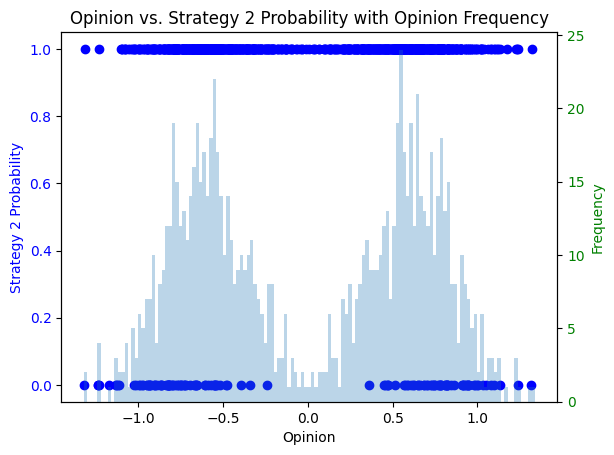

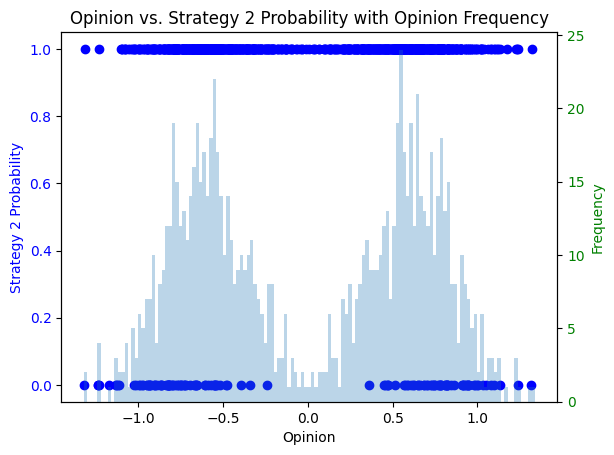

In [78]:
strat_to_threshold = {
        0: 0.01,
        1: 0.01,
        2: 0.95
    }
    
print(f"=================================")
print(f"Sim with {percent_low}")
print(f"=================================")
for agent in agents.values():
    agent.update_agent_strat_prob_history()

# Sort agents by their opinions
sorted_agents = sort_agents_by_opinion(agents)
round_numbers = list(range(len(next(iter(agents.values())).old_strategy_weights)))  # Assuming all have the same round count

for iteration in range(0, 1000, 10):

    # Assuming `sorted_agents` is a list of tuples and you have access to opinion and strategy probability data
    for strat, threshold in strat_to_threshold.items():  # For each strategy
        if strat != 2:
            continue
        opinions = []
        strat_prob = []

        # Collect data for each agent
        for uuid, agent in sorted_agents:
            opinions.append(agent.opinions[0])
            strat_prob.append(agent.agent_strat_prob_history[iteration][strat])

        # Create a plot with two y-axes
        fig, ax1 = plt.subplots()

        # Scatter plot on primary y-axis
        ax1.scatter(opinions, strat_prob, color='b')
        # Get range for which everyone is above the threshold
        # is_above_threshold = strat_to_threshold[strat] > 0.5
        # threshold_range = find_max_length_index_range(strat_prob, strat_to_threshold[strat], is_above_threshold)
        # if threshold_range:
        #     start_opinion = opinions[threshold_range[0]]
        #     end_opinion = opinions[threshold_range[1]]
        #     print(f"Opinion Range: [{start_opinion}, {end_opinion}]")  # Printing for verification
        #     y_coord = -40 if is_above_threshold == True else -40
        #     ax1.axvspan(start_opinion, end_opinion, color='y', alpha=0.5)
        #     ax1.annotate(f'Start: {start_opinion:.2f}', (start_opinion, strat_prob[threshold_range[0]]),
        #         xytext=(y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')
        #     ax1.annotate(f'End: {end_opinion:.2f}', (end_opinion, strat_prob[threshold_range[1]]),
        #         xytext=(-y_coord, 20), textcoords="offset points", ha='center', va='top', color='red')


        # ax1.axvline(x=0, color='r', linestyle='--')  # 'r' for red, '--' for dashed line style

        ax1.set_xlabel('Opinion')
        ax1.set_ylabel(f'Strategy {strat} Probability', color='b')
        
        # Create secondary y-axis for the histogram
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.hist(opinions, bins=np.arange(min(opinions), max(opinions) + 0.02, 0.02), alpha=0.3)
        ax2.set_ylabel('Frequency', color='g')

        # Change the tick color and label color to match the plots
        ax1.tick_params(axis='y', labelcolor='b')
        ax2.tick_params(axis='y', labelcolor='g')

        plt.title(f'Opinion vs. Strategy {strat} Probability with Opinion Frequency')
        plt.show()
